# Classic Machine Learning Models Part

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# TASK 1: DATASET LOADING AND INITIAL EXPLORATION

In [ ]:
# Load the dataset
train_path = '/content/Question Answer Classification Dataset 1[Training].csv'
test_path = '/content/Question Answer Classification Dataset[Test].csv'
print("* Loading datasets...")
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
print("* Dataset loaded successfully")
print("* Training set shape:", df_train.shape)
print("* Test set shape:", df_test.shape)

# Display basic info
print("\n* First 5 rows of training data (using .head()):")
print(df_train.head(10))

# Add this line to see the last 5 rows
print("\n* Last 5 rows of training data (using .tail()):")
print(df_train.tail(10))

print("\n* Data types:")
print(df_train.dtypes)

print("\n* Missing values in training set:")
missing_train = df_train.isnull().sum()
for column, count in missing_train.items():
    print(f"  {column}: {count}")

print("\n* Missing values in test set:")
missing_test = df_test.isnull().sum()
for column, count in missing_test.items():
    print(f"  {column}: {count}")

* Loading datasets...
* Dataset loaded successfully
* Training set shape: (279999, 2)
* Test set shape: (59999, 2)

* First 5 rows of training data (using .head()):
                                             QA Text                   Class
0  Question Title:\nHave you liked a person who i...  Family & Relationships
1  Question Title:\nwhat is simulation?\nQuestion...   Science & Mathematics
2  Question Title:\nhelp to  loose weight?\nQuest...                  Health
3  Question Title:\nDid you know that the KKK ado...      Business & Finance
4  Question Title:\nhow can i find an old friend ...  Family & Relationships
5  Question Title:\nbest low start up cost busine...      Business & Finance
6  Question Title:\nWhat makes  you the happiest ...  Family & Relationships
7  Question Title:\nHow good is Comcast HDTV?\nQu...   Entertainment & Music
8  Question Title:\nHow come im so dumb with ever...  Family & Relationships
9  Question Title:\ni love foto woman alder me?\n...  Family & Re

# TASK 2: EXPLORATORY DATA ANALYSIS (EDA)

  Society & Culture: 28210 samples (10.1%)
  Sports: 28148 samples (10.1%)
  Politics & Government: 28142 samples (10.1%)
  Family & Relationships: 28133 samples (10.0%)
  Health: 28047 samples (10.0%)
  Computers & Internet: 27966 samples (10.0%)
  Entertainment & Music: 27962 samples (10.0%)
  Science & Mathematics: 27915 samples (10.0%)
  Education & Reference: 27751 samples (9.9%)
  Business & Finance: 27725 samples (9.9%)
* Total unique classes: 10

* Dataset balance analysis:
  Dataset is well balanced


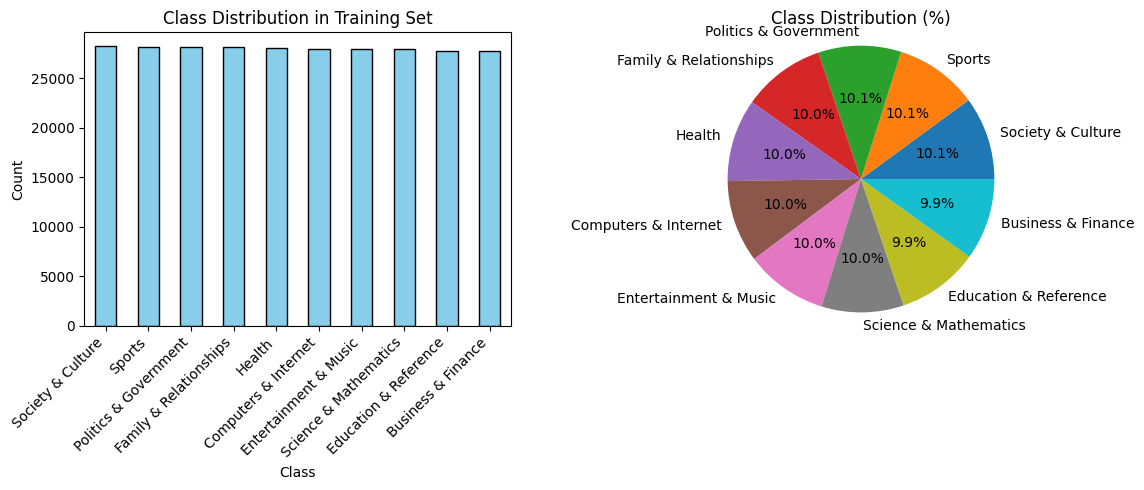


* Text length analysis:
  Average text length: 97.7 words
  Maximum text length: 1382 words
  Minimum text length: 7 words
  Median text length: 66.0 words


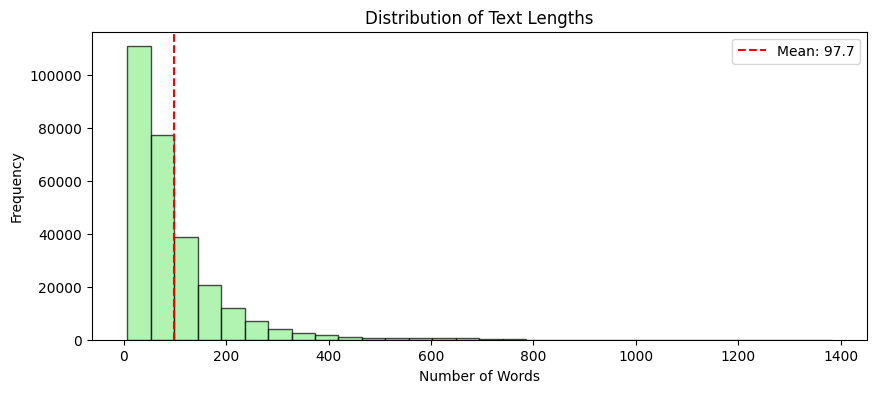


* Generating word cloud for overall dataset...


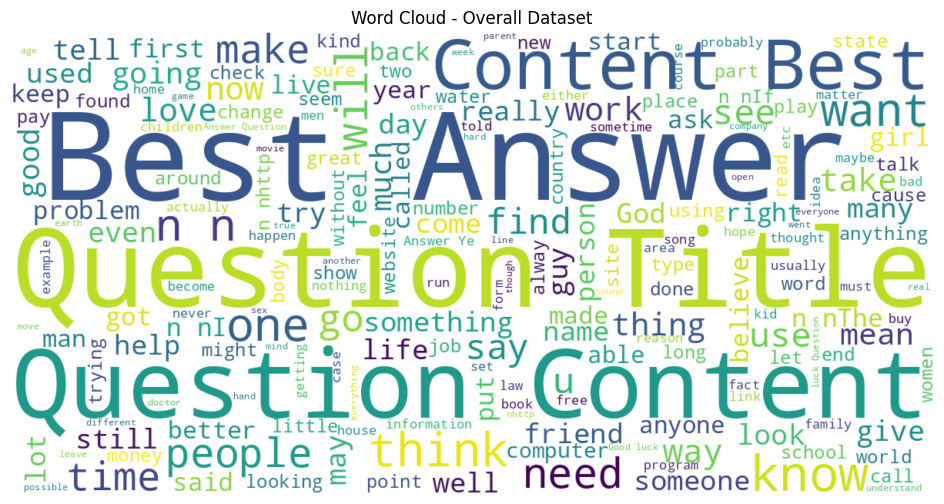


* Word frequency analysis:
  Top 20 most frequent words:
     1. the: 1071428
     2. to: 708307
     3. and: 606331
     4. a: 603731
     5. question: 574468
     6. of: 481500
     7. i: 473374
     8. is: 434702
     9. you: 412888
    10. in: 362667
    11. best: 307696
    12. that: 279719
    13. it: 272862
    14. for: 242914
    15. are: 197276
    16. have: 192413
    17. on: 171164
    18. be: 167850
    19. or: 157574
    20. with: 156523


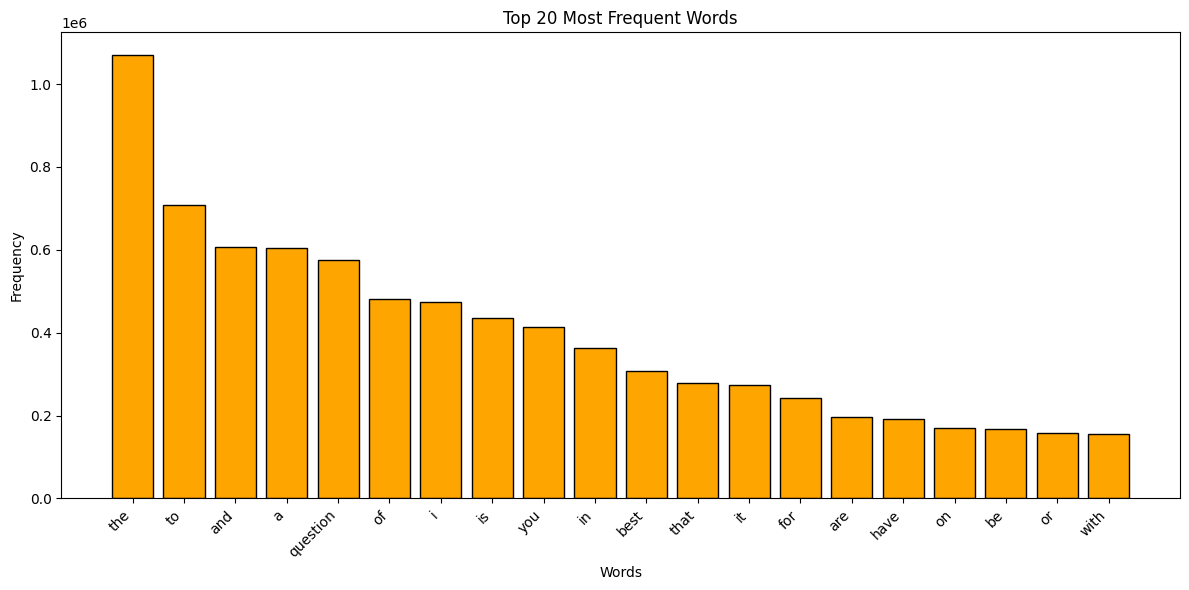


* Analysis by class:

  Society & Culture - Top 5 words:
    the: 130484
    to: 86502
    and: 78986
    of: 66927
    a: 66692

  Sports - Top 5 words:
    the: 97591
    question: 57106
    a: 45895
    to: 44597
    and: 42299

  Politics & Government - Top 5 words:
    the: 150971
    to: 89566
    and: 70504
    a: 66908
    of: 65460

  Family & Relationships - Top 5 words:
    to: 91922
    i: 88968
    and: 79013
    you: 67436
    a: 65963

  Health - Top 5 words:
    the: 98279
    to: 84599
    and: 79012
    a: 73980
    i: 69074

  Computers & Internet - Top 5 words:
    the: 91622
    to: 73048
    question: 56976
    a: 55032
    i: 52488

  Entertainment & Music - Top 5 words:
    the: 80702
    question: 56832
    a: 43456
    to: 42185
    and: 41815

  Science & Mathematics - Top 5 words:
    the: 163176
    of: 80758
    a: 65760
    is: 64805
    to: 61854

  Education & Reference - Top 5 words:
    the: 106587
    to: 62368
    a: 57487
    question: 57100
    o

In [ ]:
class_counts = df_train['Class'].value_counts()
total_samples = len(df_train)

for class_name, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"  {class_name}: {count} samples ({percentage:.1f}%)")

print(f"* Total unique classes: {len(class_counts)}")

print("\n* Dataset balance analysis:")
min_samples = class_counts.min()
max_samples = class_counts.max()
balance_ratio = min_samples / max_samples
if balance_ratio >= 0.8:
    print("  Dataset is well balanced")
else:
    print(f"  Dataset has some imbalance (ratio: {balance_ratio:.2f})")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")

plt.xticks(rotation=45, ha='right')


plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.title("Class Distribution (%)")
plt.axis('equal')

plt.tight_layout()
plt.show()

# Text length analysis
print("\n* Text length analysis:")
qa_texts = df_train['QA Text'].astype(str)
text_lengths = [len(text.split()) for text in qa_texts]

text_lengths = np.array(text_lengths)
print(f"  Average text length: {text_lengths.mean():.1f} words")
print(f"  Maximum text length: {text_lengths.max()} words")
print(f"  Minimum text length: {text_lengths.min()} words")
print(f"  Median text length: {np.median(text_lengths):.1f} words")

plt.figure(figsize=(10, 4))
plt.hist(text_lengths, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.axvline(text_lengths.mean(), color='red', linestyle='--', label=f'Mean: {text_lengths.mean():.1f}')
plt.legend()
plt.show()


print("\n* Generating word cloud for overall dataset...")
all_text = " ".join(df_train["QA Text"].astype(str))

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Overall Dataset")
plt.axis("off")
plt.show()


print("\n* Word frequency analysis:")
all_words = [word for text in qa_texts for word in text.lower().split() if word.isalpha()]

word_freq = Counter(all_words)
top_20_words = word_freq.most_common(20)

print("  Top 20 most frequent words:")
for i, (word, count) in enumerate(top_20_words, 1):
    print(f"    {i:2d}. {word}: {count}")

# Plot top 20 words
words, counts = zip(*top_20_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='orange', edgecolor='black')
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analysis by class
print("\n* Analysis by class:")
for class_name in class_counts.index:
    # Filter data for the current class
    class_texts = df_train[df_train['Class'] == class_name]['QA Text'].astype(str)

    class_alpha_words = [word for text in class_texts for word in text.lower().split() if word.isalpha()]

    class_word_freq = Counter(class_alpha_words)
    class_top_5 = class_word_freq.most_common(5)

    print(f"\n  {class_name} - Top 5 words:")
    for word, count in class_top_5:
        print(f"    {word}: {count}")

# TASK 3: DATA PREPROCESSING


DATA PREPROCESSING
* Initial number of standard stop words: 198

* Preprocessing training data...
* Preprocessing test data...
* Preprocessing completed

* Preprocessing example:
  Original: Question Title:
Have you liked a person who is bi-sexual and couldn't get a relationship going ?
Question Content:

Best Answer:
no but I'm bi there sexual orientation probably is not the reason you cant get a relationship going
  Processed: liked person bisexual couldnt get relationship going im bi sexual orientation probably reason cant get relationship going

* Label mapping:
  0: Business & Finance
  1: Computers & Internet
  2: Education & Reference
  3: Entertainment & Music
  4: Family & Relationships
  5: Health
  6: Politics & Government
  7: Science & Mathematics
  8: Society & Culture
  9: Sports

* Using full training data for model training...
* Analyzing top 20 words after preprocessing...
  Top 20 most frequent words after preprocessing:
     1. get: 93203
     2. like: 92266
     3

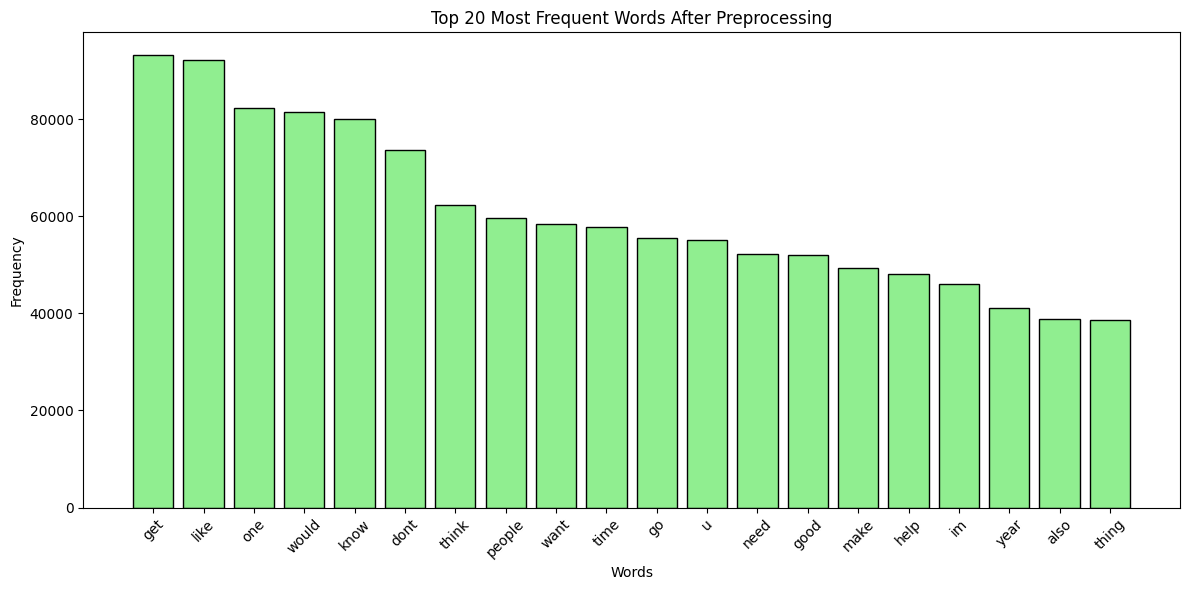

In [ ]:
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
print(f"* Initial number of standard stop words: {len(stop_words)}")

custom_stop_words = ['question', 'title', 'content', 'best', 'answer', 'body']
stop_words.update(custom_stop_words)

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    words = text.split()

    filtered_words = []
    for word in words:

        if word.isalnum() == True and word not in stop_words:
            if word.isalpha():
                lemmatized_word = lemmatizer.lemmatize(word)
                filtered_words.append(lemmatized_word)
            else:

                filtered_words.append(word)

    processed_text = " ".join(filtered_words)
    return processed_text

print("\n* Preprocessing training data...")
X_train_processed = []
for text in df_train['QA Text'].astype(str):
    processed_text = preprocess_text(text)
    X_train_processed.append(processed_text)

print("* Preprocessing test data...")
X_test_processed = []
for text in df_test['QA Text'].astype(str):
    processed_text = preprocess_text(text)
    X_test_processed.append(processed_text)

print("* Preprocessing completed")

print("\n* Preprocessing example:")
original_text = df_train['QA Text'].iloc[0]
processed_text = X_train_processed[0]
print(f"  Original: {original_text}")
print(f"  Processed: {processed_text}")


le = LabelEncoder()
y_train = le.fit_transform(df_train['Class'])
y_test = le.transform(df_test['Class'])

label_mapping = {}
for i, class_name in enumerate(le.classes_):
    label_mapping[i] = class_name

print("\n* Label mapping:")
for label_id, class_name in label_mapping.items():
    print(f"  {label_id}: {class_name}")

print("\n* Using full training data for model training...")
X_train_final = X_train_processed
y_train_final = y_train

print("* Analyzing top 20 words after preprocessing...")
processed_all_words = []
for text in X_train_processed:
    words = text.split()
    for word in words:
        processed_all_words.append(word)

processed_word_freq = Counter(processed_all_words)
processed_top_20_words = processed_word_freq.most_common(20)

print("  Top 20 most frequent words after preprocessing:")
for i, (word, count) in enumerate(processed_top_20_words, 1):
    print(f"    {i:2d}. {word}: {count}")

words_processed, counts_processed = zip(*processed_top_20_words)

plt.figure(figsize=(12, 6))
plt.bar(words_processed, counts_processed, color='lightgreen', edgecolor='black')
plt.title("Top 20 Most Frequent Words After Preprocessing")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# TASK 4: WORD REPRESENTATION TECHNIQUES

In [ ]:
print("\n" + "="*50)
print("WORD REPRESENTATION TECHNIQUES")
print("="*50)

# 1. Bag of Words (BoW) - Further optimized for higher accuracy
print("* Creating Bag of Words representation...")
bow_vectorizer = CountVectorizer(
    max_features=10000,
    ngram_range=(1, 3),
    min_df=5,
    max_df=0.85,
    binary=False,
    strip_accents='ascii'
)
X_train_bow = bow_vectorizer.fit_transform(X_train_final)
X_test_bow = bow_vectorizer.transform(X_test_processed)

print(f"  BoW feature matrix shape: {X_train_bow.shape}")

# 2. TF-IDF - Aggressive optimization for best performance
print("* Creating TF-IDF representation...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 3),
    min_df=5,
    max_df=0.85,
    sublinear_tf=True,
    use_idf=True,
    smooth_idf=True,
    norm='l2',
    strip_accents='ascii'
)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_final)
X_test_tfidf = tfidf_vectorizer.transform(X_test_processed)

print(f"  TF-IDF feature matrix shape: {X_train_tfidf.shape}")


WORD REPRESENTATION TECHNIQUES
* Creating Bag of Words representation...
  BoW feature matrix shape: (279999, 10000)
* Creating TF-IDF representation...
  TF-IDF feature matrix shape: (279999, 10000)


# TASK 5: MACHINE LEARNING MODELS IMPLEMENTATION

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=150,
        max_depth=12,
        min_samples_split=15,
        min_samples_leaf=8,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    'Logistic Regression': LogisticRegression(
        C=2.0,
        solver='lbfgs',
        penalty='l2',
        class_weight='balanced',
        max_iter=300,
        random_state=42,
        n_jobs=-1
    ),
    'Naive Bayes': MultinomialNB(
        alpha=0.1,
        fit_prior=True,
        class_prior=None,
    )
}

representations = {
    'BoW': (X_train_bow, X_test_bow),
    'TF-IDF': (X_train_tfidf, X_test_tfidf)
}

results = {}

print("* Starting model training experiments...")

for repr_name, (X_tr, X_te) in representations.items():
    print(f"\n* Training with {repr_name} representation:")
    results[repr_name] = {}

    for model_name, model in models.items():
        print(f"  Training {model_name}...")

        start_time = time.time()
        model.fit(X_tr, y_train_final)
        training_time = time.time() - start_time
        y_train_pred = model.predict(X_tr)
        train_accuracy = accuracy_score(y_train_final, y_train_pred)
        y_test_pred = model.predict(X_te)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
        test_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
        results[repr_name][model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'test_f1_macro': test_f1_macro,
            'test_f1_weighted': test_f1_weighted,
            'training_time': training_time,
            'predictions': y_test_pred
        }
        print(f"    Train Accuracy: {train_accuracy:.4f}")
        print(f"    Test Accuracy: {test_accuracy:.4f}")
        print(f"    Test F1 (Macro): {test_f1_macro:.4f}")
        print(f"    Training Time: {training_time:.2f}s")

* Starting model training experiments...

* Training with BoW representation:
  Training Random Forest...
    Train Accuracy: 0.5336
    Test Accuracy: 0.5290
    Test F1 (Macro): 0.5274
    Training Time: 24.68s
  Training Logistic Regression...
    Train Accuracy: 0.7348
    Test Accuracy: 0.6379
    Test F1 (Macro): 0.6353
    Training Time: 113.16s
  Training Naive Bayes...
    Train Accuracy: 0.6780
    Test Accuracy: 0.6707
    Test F1 (Macro): 0.6677
    Training Time: 0.18s

* Training with TF-IDF representation:
  Training Random Forest...
    Train Accuracy: 0.5369
    Test Accuracy: 0.5309
    Test F1 (Macro): 0.5276
    Training Time: 46.09s
  Training Logistic Regression...
    Train Accuracy: 0.7385
    Test Accuracy: 0.6884
    Test F1 (Macro): 0.6862
    Training Time: 76.02s
  Training Naive Bayes...
    Train Accuracy: 0.6859
    Test Accuracy: 0.6749
    Test F1 (Macro): 0.6719
    Training Time: 0.14s


# TASK 6: RESULTS ANALYSIS AND VISUALIZATION


* COMPLETE RESULTS SUMMARY:
Representation               Model  Train_Accuracy  Test_Accuracy  Test_F1_Macro  Test_F1_Weighted  Training_Time
           BoW       Random Forest          0.5336         0.5290         0.5274            0.5274        24.6771
           BoW Logistic Regression          0.7348         0.6379         0.6353            0.6353       113.1650
           BoW         Naive Bayes          0.6780         0.6707         0.6677            0.6677         0.1814
        TF-IDF       Random Forest          0.5369         0.5309         0.5276            0.5276        46.0939
        TF-IDF Logistic Regression          0.7385         0.6884         0.6862            0.6862        76.0229
        TF-IDF         Naive Bayes          0.6859         0.6749         0.6719            0.6719         0.1397

* BEST PERFORMING MODEL:
  TF-IDF + Logistic Regression
  Train Accuracy: 0.7385
  Test Accuracy: 0.6884

* WORST PERFORMING MODEL:
  BoW + Random Forest
  Train Accuracy: 

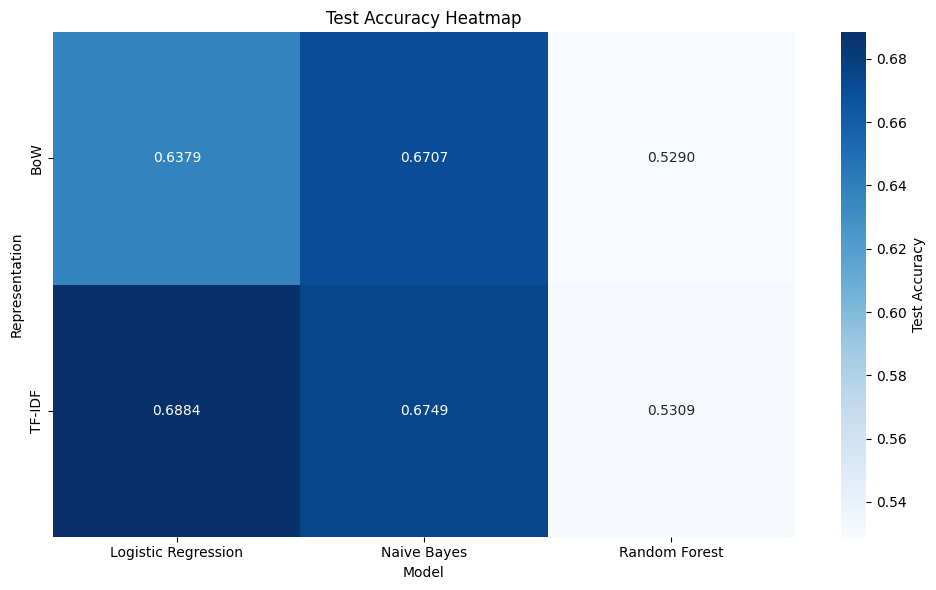


* Displaying F1 Macro Score Heatmap...


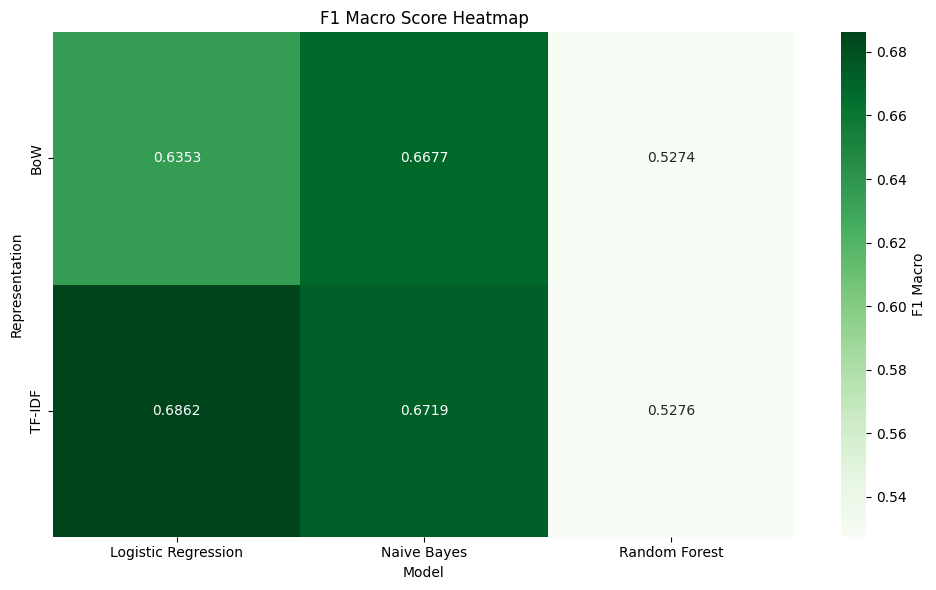


* Displaying F1 Macro vs. Weighted Score Bar Chart...


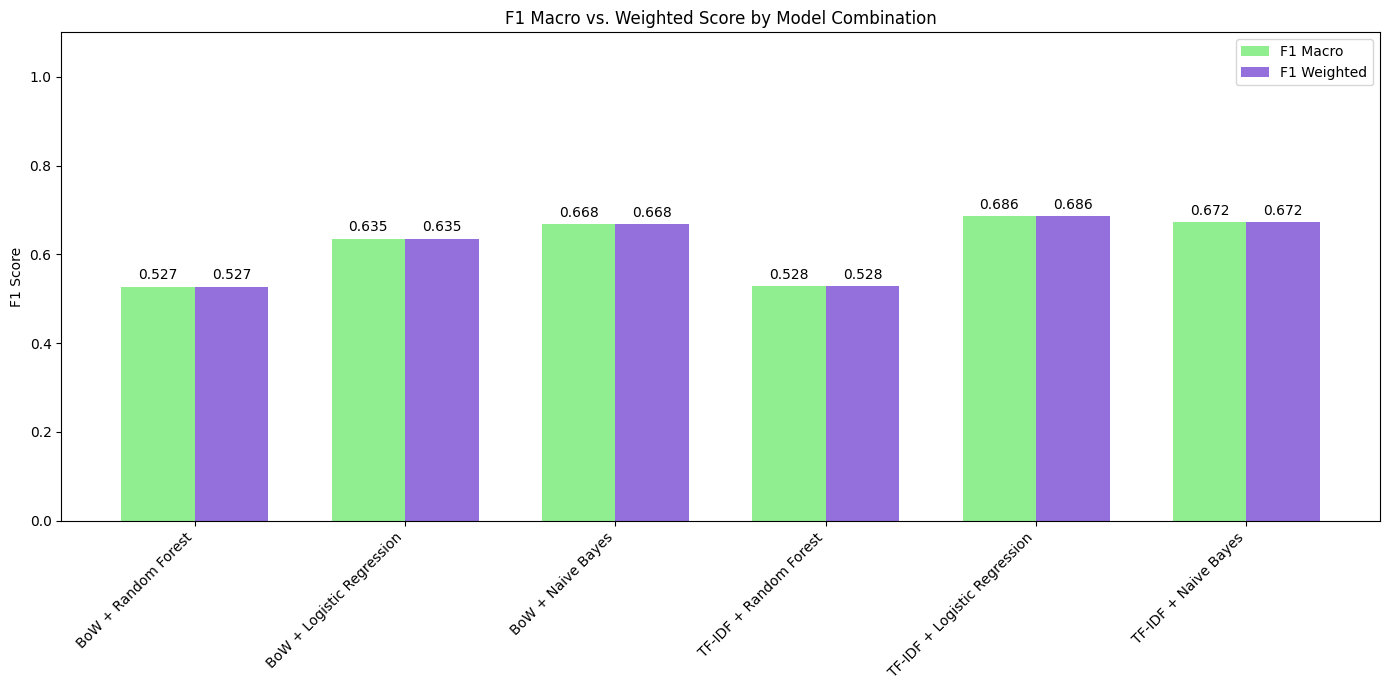


* Displaying Training Time Heatmap...


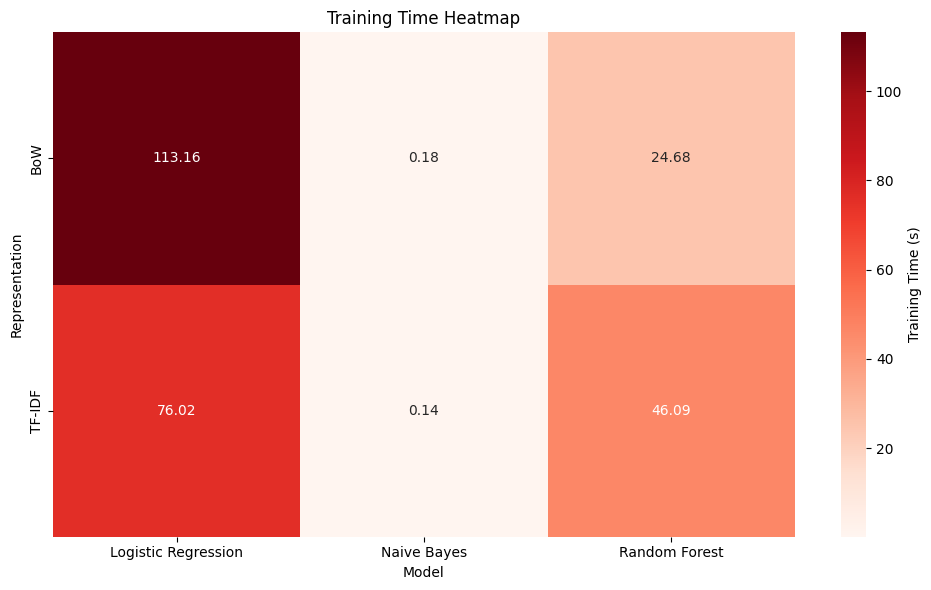


* Displaying Train vs. Test Accuracy Bar Chart...


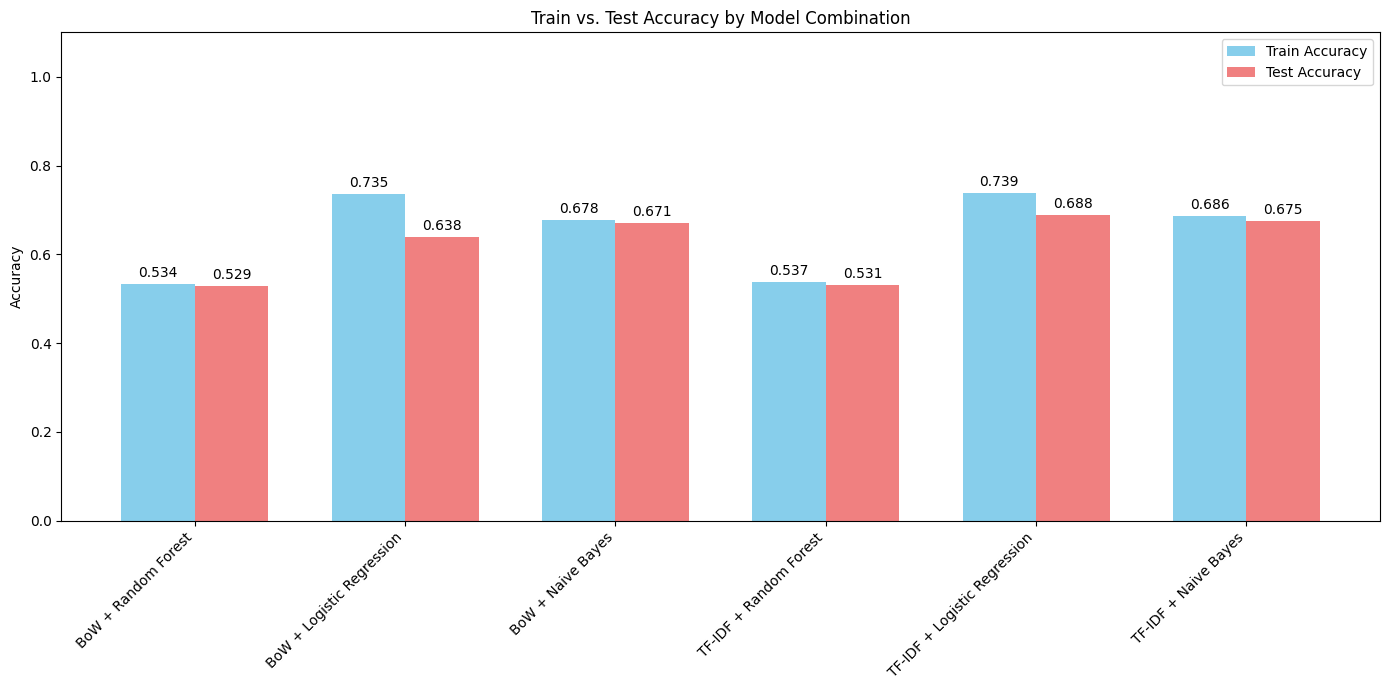


INDIVIDUAL CONFUSION MATRICES

* Confusion Matrix for BoW + Random Forest (Accuracy: 0.5290)


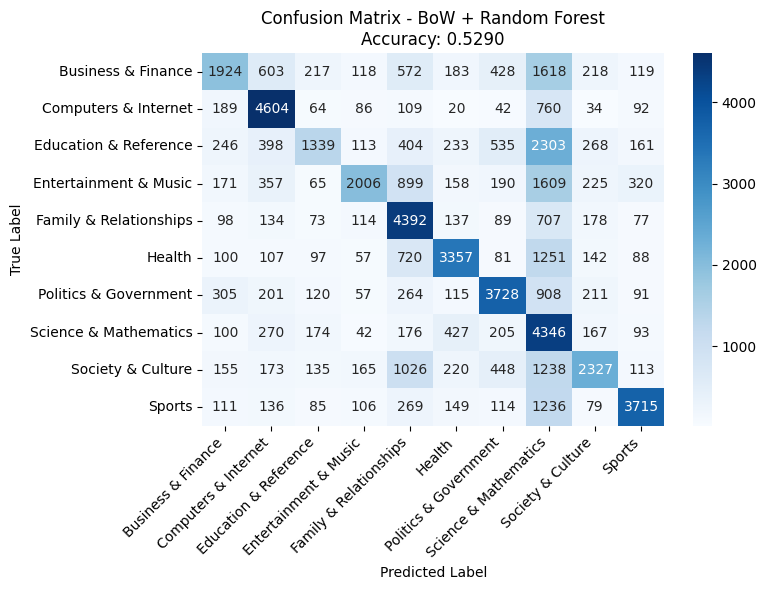

  Classification Report for BoW + Random Forest:
                        precision    recall  f1-score   support

    Business & Finance       0.57      0.32      0.41      6000
  Computers & Internet       0.66      0.77      0.71      6000
 Education & Reference       0.57      0.22      0.32      6000
 Entertainment & Music       0.70      0.33      0.45      6000
Family & Relationships       0.50      0.73      0.59      5999
                Health       0.67      0.56      0.61      6000
 Politics & Government       0.64      0.62      0.63      6000
 Science & Mathematics       0.27      0.72      0.40      6000
     Society & Culture       0.60      0.39      0.47      6000
                Sports       0.76      0.62      0.68      6000

              accuracy                           0.53     59999
             macro avg       0.59      0.53      0.53     59999
          weighted avg       0.59      0.53      0.53     59999


* Confusion Matrix for BoW + Logistic Regression (A

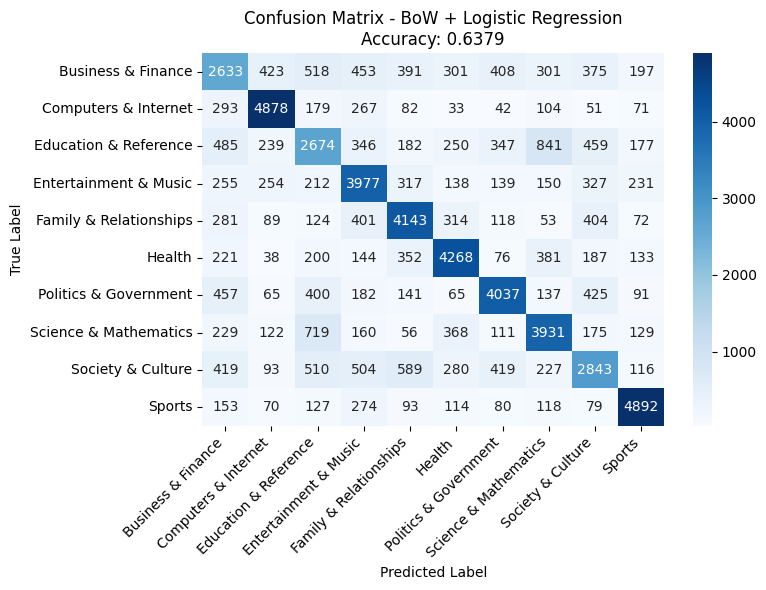

  Classification Report for BoW + Logistic Regression:
                        precision    recall  f1-score   support

    Business & Finance       0.49      0.44      0.46      6000
  Computers & Internet       0.78      0.81      0.80      6000
 Education & Reference       0.47      0.45      0.46      6000
 Entertainment & Music       0.59      0.66      0.63      6000
Family & Relationships       0.65      0.69      0.67      5999
                Health       0.70      0.71      0.70      6000
 Politics & Government       0.70      0.67      0.69      6000
 Science & Mathematics       0.63      0.66      0.64      6000
     Society & Culture       0.53      0.47      0.50      6000
                Sports       0.80      0.82      0.81      6000

              accuracy                           0.64     59999
             macro avg       0.63      0.64      0.64     59999
          weighted avg       0.63      0.64      0.64     59999


* Confusion Matrix for BoW + Naive Bayes (Acc

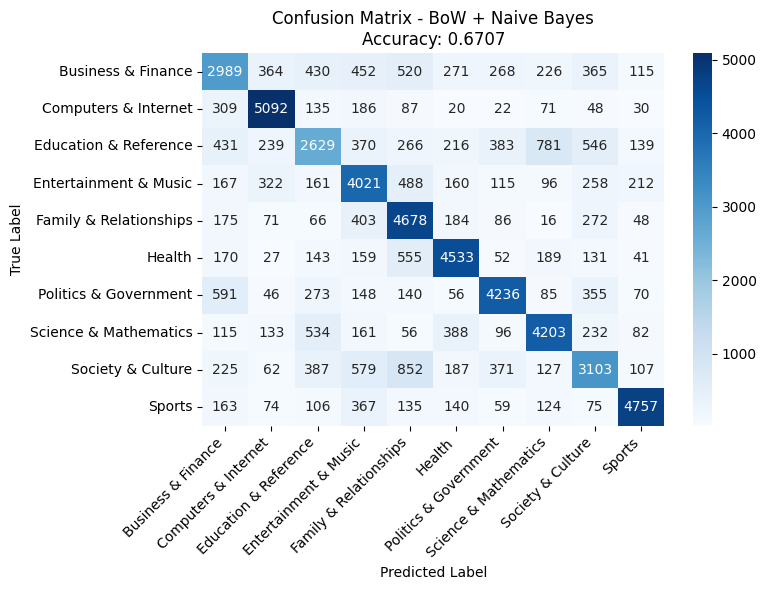

  Classification Report for BoW + Naive Bayes:
                        precision    recall  f1-score   support

    Business & Finance       0.56      0.50      0.53      6000
  Computers & Internet       0.79      0.85      0.82      6000
 Education & Reference       0.54      0.44      0.48      6000
 Entertainment & Music       0.59      0.67      0.63      6000
Family & Relationships       0.60      0.78      0.68      5999
                Health       0.74      0.76      0.75      6000
 Politics & Government       0.74      0.71      0.72      6000
 Science & Mathematics       0.71      0.70      0.71      6000
     Society & Culture       0.58      0.52      0.55      6000
                Sports       0.85      0.79      0.82      6000

              accuracy                           0.67     59999
             macro avg       0.67      0.67      0.67     59999
          weighted avg       0.67      0.67      0.67     59999


* Confusion Matrix for TF-IDF + Random Forest (Accura

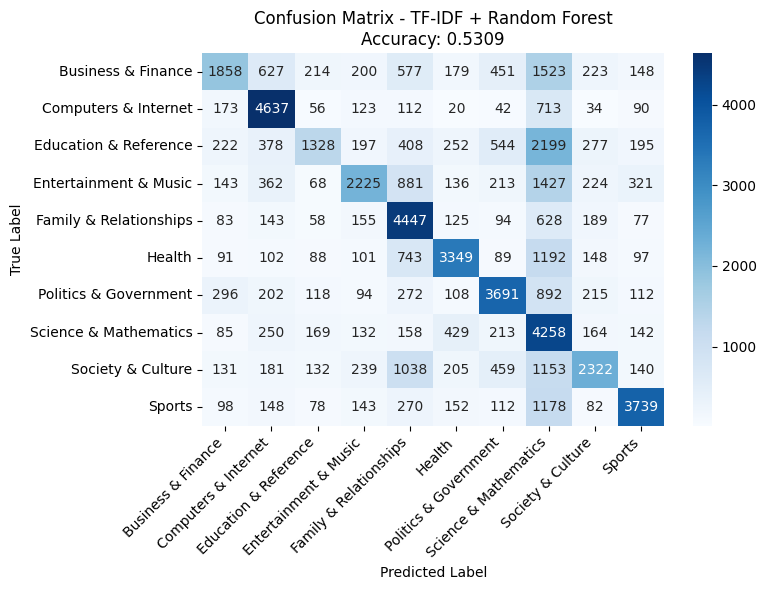

  Classification Report for TF-IDF + Random Forest:
                        precision    recall  f1-score   support

    Business & Finance       0.58      0.31      0.40      6000
  Computers & Internet       0.66      0.77      0.71      6000
 Education & Reference       0.58      0.22      0.32      6000
 Entertainment & Music       0.62      0.37      0.46      6000
Family & Relationships       0.50      0.74      0.60      5999
                Health       0.68      0.56      0.61      6000
 Politics & Government       0.62      0.62      0.62      6000
 Science & Mathematics       0.28      0.71      0.40      6000
     Society & Culture       0.60      0.39      0.47      6000
                Sports       0.74      0.62      0.68      6000

              accuracy                           0.53     59999
             macro avg       0.59      0.53      0.53     59999
          weighted avg       0.59      0.53      0.53     59999


* Confusion Matrix for TF-IDF + Logistic Regress

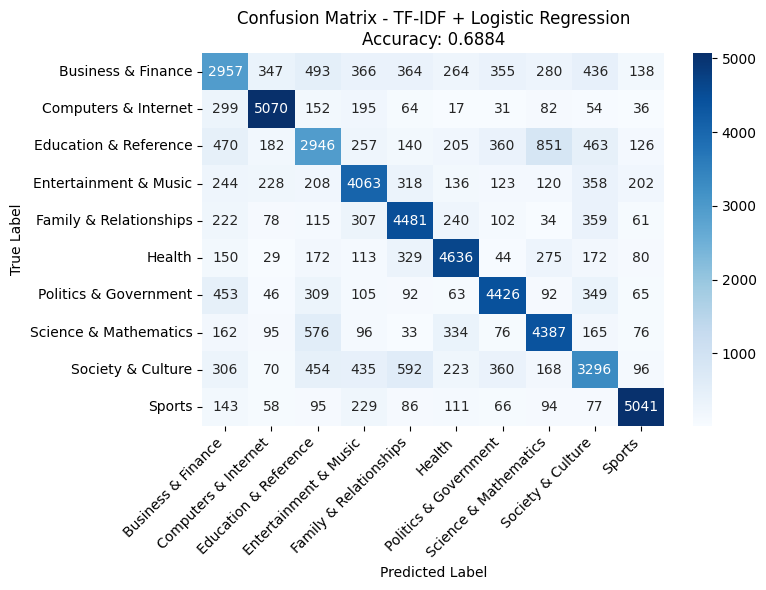

  Classification Report for TF-IDF + Logistic Regression:
                        precision    recall  f1-score   support

    Business & Finance       0.55      0.49      0.52      6000
  Computers & Internet       0.82      0.84      0.83      6000
 Education & Reference       0.53      0.49      0.51      6000
 Entertainment & Music       0.66      0.68      0.67      6000
Family & Relationships       0.69      0.75      0.72      5999
                Health       0.74      0.77      0.76      6000
 Politics & Government       0.74      0.74      0.74      6000
 Science & Mathematics       0.69      0.73      0.71      6000
     Society & Culture       0.58      0.55      0.56      6000
                Sports       0.85      0.84      0.85      6000

              accuracy                           0.69     59999
             macro avg       0.68      0.69      0.69     59999
          weighted avg       0.68      0.69      0.69     59999


* Confusion Matrix for TF-IDF + Naive Baye

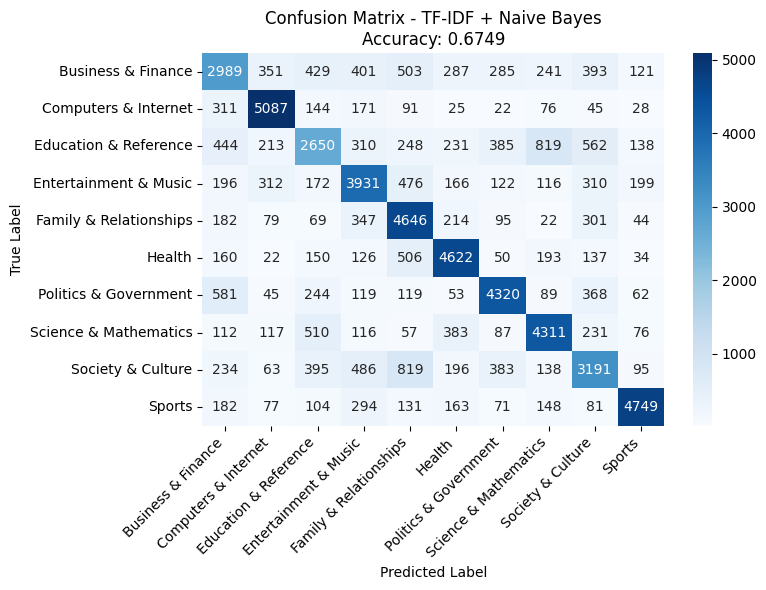

  Classification Report for TF-IDF + Naive Bayes:
                        precision    recall  f1-score   support

    Business & Finance       0.55      0.50      0.52      6000
  Computers & Internet       0.80      0.85      0.82      6000
 Education & Reference       0.54      0.44      0.49      6000
 Entertainment & Music       0.62      0.66      0.64      6000
Family & Relationships       0.61      0.77      0.68      5999
                Health       0.73      0.77      0.75      6000
 Politics & Government       0.74      0.72      0.73      6000
 Science & Mathematics       0.70      0.72      0.71      6000
     Society & Culture       0.57      0.53      0.55      6000
                Sports       0.86      0.79      0.82      6000

              accuracy                           0.67     59999
             macro avg       0.67      0.67      0.67     59999
          weighted avg       0.67      0.67      0.67     59999


DETAILED ANALYSIS OF BEST MODEL (TF-IDF + Logistic

In [ ]:
summary_data = []
for repr_name in representations.keys():
    for model_name in models.keys():
        result = results[repr_name][model_name]
        summary_data.append({
            'Representation': repr_name,
            'Model': model_name,
            'Train_Accuracy': result['train_accuracy'],
            'Test_Accuracy': result['test_accuracy'],
            'Test_F1_Macro': result['test_f1_macro'],
            'Test_F1_Weighted': result['test_f1_weighted'],
            'Training_Time': result['training_time']
        })

results_df = pd.DataFrame(summary_data)

print("\n* COMPLETE RESULTS SUMMARY:")
print(results_df.to_string(index=False, float_format='%.4f'))

best_test_accuracy = results_df.loc[results_df['Test_Accuracy'].idxmax()]
worst_test_accuracy = results_df.loc[results_df['Test_Accuracy'].idxmin()]

print(f"\n* BEST PERFORMING MODEL:")
print(f"  {best_test_accuracy['Representation']} + {best_test_accuracy['Model']}")
print(f"  Train Accuracy: {best_test_accuracy['Train_Accuracy']:.4f}")
print(f"  Test Accuracy: {best_test_accuracy['Test_Accuracy']:.4f}")

print(f"\n* WORST PERFORMING MODEL:")
print(f"  {worst_test_accuracy['Representation']} + {worst_test_accuracy['Model']}")
print(f"  Train Accuracy: {worst_test_accuracy['Train_Accuracy']:.4f}")
print(f"  Test Accuracy: {worst_test_accuracy['Test_Accuracy']:.4f}")

print("\n* Displaying Test Accuracy Heatmap...")
plt.figure(figsize=(10, 6))
pivot_accuracy = results_df.pivot(index='Representation', columns='Model', values='Test_Accuracy')
sns.heatmap(pivot_accuracy, annot=True, fmt='.4f', cmap='Blues', cbar_kws={'label': 'Test Accuracy'})
plt.title('Test Accuracy Heatmap')
plt.tight_layout()
plt.show()

print("\n* Displaying F1 Macro Score Heatmap...")
plt.figure(figsize=(10, 6))
pivot_f1 = results_df.pivot(index='Representation', columns='Model', values='Test_F1_Macro')
sns.heatmap(pivot_f1, annot=True, fmt='.4f', cmap='Greens', cbar_kws={'label': 'F1 Macro'})
plt.title('F1 Macro Score Heatmap')
plt.tight_layout()
plt.show()

print("\n* Displaying F1 Macro vs. Weighted Score Bar Chart...")
results_df['Model_Repr'] = results_df['Representation'] + ' + ' + results_df['Model']
x = np.arange(len(results_df))
width = 0.35
fig, ax = plt.subplots(figsize=(14, 7))
macro_bars = ax.bar(x - width/2, results_df['Test_F1_Macro'], width, label='F1 Macro', color='lightgreen')
weighted_bars = ax.bar(x + width/2, results_df['Test_F1_Weighted'], width, label='F1 Weighted', color='mediumpurple')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Macro vs. Weighted Score by Model Combination')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model_Repr'], rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1.1)
ax.bar_label(macro_bars, padding=3, fmt='%.3f')
ax.bar_label(weighted_bars, padding=3, fmt='%.3f')
fig.tight_layout()
plt.show()

print("\n* Displaying Training Time Heatmap...")
plt.figure(figsize=(10, 6))
pivot_time = results_df.pivot(index='Representation', columns='Model', values='Training_Time')
sns.heatmap(pivot_time, annot=True, fmt='.2f', cmap='Reds', cbar_kws={'label': 'Training Time (s)'})
plt.title('Training Time Heatmap')
plt.tight_layout()
plt.show()

print("\n* Displaying Train vs. Test Accuracy Bar Chart...")
x = np.arange(len(results_df))
width = 0.35
fig, ax = plt.subplots(figsize=(14, 7))
train_bars = ax.bar(x - width/2, results_df['Train_Accuracy'], width, label='Train Accuracy', color='skyblue')
test_bars = ax.bar(x + width/2, results_df['Test_Accuracy'], width, label='Test Accuracy', color='lightcoral')
ax.set_ylabel('Accuracy')
ax.set_title('Train vs. Test Accuracy by Model Combination')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model_Repr'], rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1.1)
ax.bar_label(train_bars, padding=3, fmt='%.3f')
ax.bar_label(test_bars, padding=3, fmt='%.3f')
fig.tight_layout()
plt.show()

print("\n" + "="*60)
print("INDIVIDUAL CONFUSION MATRICES")
print("="*60)

for repr_name in representations.keys():
    for model_name in models.keys():
        model_predictions = results[repr_name][model_name]['predictions']
        model_accuracy = results[repr_name][model_name]['test_accuracy']

        print(f"\n* Confusion Matrix for {repr_name} + {model_name} (Accuracy: {model_accuracy:.4f})")

        cm = confusion_matrix(y_test, model_predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=le.classes_, yticklabels=le.classes_)
        plt.title(f'Confusion Matrix - {repr_name} + {model_name}\nAccuracy: {model_accuracy:.4f}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0, va='center')
        plt.tight_layout()
        plt.show()

        print(f"  Classification Report for {repr_name} + {model_name}:")
        class_report = classification_report(y_test, model_predictions, target_names=le.classes_)
        print(class_report)

best_repr = best_test_accuracy['Representation']
best_model = best_test_accuracy['Model']
best_predictions = results[best_repr][best_model]['predictions']

print(f"\n" + "="*60)
print(f"DETAILED ANALYSIS OF BEST MODEL ({best_repr} + {best_model})")
print("="*60)

print("\n* Per-class Performance Analysis:")
for i, class_name in enumerate(le.classes_):
    class_mask = (y_test == i)
    class_predictions = best_predictions[class_mask]
    class_accuracy = accuracy_score(y_test[class_mask], class_predictions)
    print(f"  {class_name}: {class_accuracy:.4f}")

# TASK 7: MODEL COMPARISON AND INSIGHTS


In [ ]:
print("\n" + "="*50)
print("MODEL COMPARISON AND INSIGHTS")
print("="*50)

# Compare representations
print("* REPRESENTATION COMPARISON:")
bow_avg = results_df[results_df['Representation'] == 'BoW']['Test_Accuracy'].mean()
tfidf_avg = results_df[results_df['Representation'] == 'TF-IDF']['Test_Accuracy'].mean()

print(f"  Average BoW Performance: {bow_avg:.4f}")
print(f"  Average TF-IDF Performance: {tfidf_avg:.4f}")

if tfidf_avg > bow_avg:
    diff = tfidf_avg - bow_avg
    print(f"  TF-IDF performs better by {diff:.4f} on average")
    print("  Reason: TF-IDF considers term importance, reducing impact of common words")
else:
    diff = bow_avg - tfidf_avg
    print(f"  BoW performs better by {diff:.4f} on average")
    print("  Reason: Simple frequency counting works well for this classification task")

# Compare models
print("\n* MODEL COMPARISON:")
for model_name in models.keys():
    model_results = results_df[results_df['Model'] == model_name]
    avg_accuracy = model_results['Test_Accuracy'].mean()
    avg_time = model_results['Training_Time'].mean()
    print(f"  {model_name}:")
    print(f"    Average Accuracy: {avg_accuracy:.4f}")
    print(f"    Average Training Time: {avg_time:.2f}s")

# Final recommendations
print("\n* RECOMMENDATIONS:")
print("  1. Best overall model:", f"{best_repr} + {best_model}")
print("  2. Best balance of accuracy and speed:",
      f"{results_df.loc[results_df['Training_Time'].idxmin(), 'Representation']} + {results_df.loc[results_df['Training_Time'].idxmin(), 'Model']}")
print("  3. Most consistent performer:",
      f"{results_df.loc[results_df.groupby('Model')['Test_Accuracy'].transform('std').idxmin(), 'Model']}")



MODEL COMPARISON AND INSIGHTS
* REPRESENTATION COMPARISON:
  Average BoW Performance: 0.6125
  Average TF-IDF Performance: 0.6314
  TF-IDF performs better by 0.0189 on average
  Reason: TF-IDF considers term importance, reducing impact of common words

* MODEL COMPARISON:
  Random Forest:
    Average Accuracy: 0.5299
    Average Training Time: 35.39s
  Logistic Regression:
    Average Accuracy: 0.6632
    Average Training Time: 94.59s
  Naive Bayes:
    Average Accuracy: 0.6728
    Average Training Time: 0.16s

* RECOMMENDATIONS:
  1. Best overall model: TF-IDF + Logistic Regression
  2. Best balance of accuracy and speed: TF-IDF + Naive Bayes
  3. Most consistent performer: Random Forest


In [ ]:
# Get the predictions for the best model
best_repr = best_test_accuracy['Representation']
best_model = best_test_accuracy['Model']
best_predictions = results[best_repr][best_model]['predictions']

# Inverse transform the predictions to get the original class names
predicted_class_names = le.inverse_transform(best_predictions)

# Display some examples of original test data and their predicted class names
print("Examples of Test Data and Predicted Class Names:")
for i in range(10): # Displaying first 10 examples
    print(f"\n--- Example {i+1} ---")
    print(f"Original Text:\n{df_test['QA Text'].iloc[i]}")
    print(f"Predicted Class: {predicted_class_names[i]}")
    print(f"True Class: {df_test['Class'].iloc[i]}")

Examples of Test Data and Predicted Class Names:

--- Example 1 ---
Original Text:
Question Title:
Why does Zebras have stripes?
Question Content:
What is the purpose or those stripes? Who do they serve the Zebras in the wild life?
Best Answer:
this provides camouflage - predator vision is such that it is usually difficult for them to see complex patterns
Predicted Class: Science & Mathematics
True Class: Science & Mathematics

--- Example 2 ---
Original Text:
Question Title:
What did the itsy bitsy sipder climb up?
Question Content:

Best Answer:
waterspout
Predicted Class: Sports
True Class: Education & Reference

--- Example 3 ---
Original Text:
Question Title:
What is the difference between a Bachelors and a Masters degree?
Question Content:

Best Answer:
One difference between a Bachelors and a Masters degree are the requirements. To gain eligibility for a Bachelors, you must have at least a GED and have scored well enough on the SAT. To be eligible for a Masters Degree, you must 

# Neural Network Parts

# This part of the notebook was executed locally.

In [ ]:
# ==============================================================================
# SETUP: IMPORT LIBRARIES AND CONFIGURE GPU
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import time
import warnings
import gc

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from gensim.models import Word2Vec
import gensim.downloader as api

warnings.filterwarnings('ignore')
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"* Using device: {device}")
if torch.cuda.is_available():
    torch.cuda.empty_cache()

* Using device: cuda


# TASK 1 & 2: DATA LOADING AND PREPROCESSING

In [ ]:
# ==============================================================================
# TASK 1: DATASET LOADING
# ==============================================================================
df_train_full = pd.read_csv('dataset/Question Answer Classification Dataset 1[Training].csv')
df_test = pd.read_csv('dataset/Question Answer Classification Dataset[Test].csv')
# ==============================================================================
# TASK 2: TEXT PREPROCESSING
# ==============================================================================

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

custom_stop_words = ['question', 'title', 'content', 'best', 'answer', 'body']
stop_words.update(custom_stop_words)

def preprocess_text_nn(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    words = text.split()

    filtered_words = []
    for word in words:
        if word.isalnum() and word not in stop_words:

            if word.isalpha():
                filtered_words.append(lemmatizer.lemmatize(word))

            else:
                filtered_words.append(word)

    return " ".join(filtered_words)

print("* Preprocessing training and test data...")

X_train_processed_full = df_train_full['QA Text'].apply(preprocess_text_nn)
X_test_processed = df_test['QA Text'].apply(preprocess_text_nn)


le = LabelEncoder()
y_train_full_encoded = le.fit_transform(df_train_full['Class'])
y_test_encoded = le.transform(df_test['Class'])
num_classes = len(le.classes_)
print(f"* Preprocessing complete. Found {num_classes} classes.")

# Memory cleanup
if torch.cuda.is_available():
    torch.cuda.empty_cache()
gc.collect()

* Preprocessing training and test data...
* Preprocessing complete. Found 10 classes.


7

# TASK 3 & 4: DATA SPLITTING, TOKENIZATION, AND VECTORIZATION

In [ ]:
# ==============================================================================
# TASK 3: TRAIN-VALIDATION SPLIT (90:10)
# ==============================================================================
print("\n* Creating train-validation split (90:10)...")
X_train, X_val, y_train, y_val = train_test_split(
    X_train_processed_full, y_train_full_encoded,
    test_size=0.1, random_state=42, stratify=y_train_full_encoded
)

del X_train_processed_full
gc.collect()

# ==============================================================================
# TASK 4A: TOKENIZATION FOR EMBEDDING MODELS
# ==============================================================================
print("\n* Tokenizing and preparing sequences for embedding models...")
MAX_VOCAB_SIZE_EMB = 10000
MAX_SEQUENCE_LENGTH = 50

word_freq = {}
for text in X_train:
    for word in text.split():
        word_freq[word] = word_freq.get(word, 0) + 1

sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
vocab_words = [word for word, freq in sorted_words[:MAX_VOCAB_SIZE_EMB-2]]
word_to_idx = {'<PAD>': 0, '<UNK>': 1, **{word: i + 2 for i, word in enumerate(vocab_words)}}
vocab_size_emb = len(word_to_idx)
print(f"* Vocabulary size for embeddings: {vocab_size_emb}")

def texts_to_sequences(texts, word_to_idx, max_len):
    seqs = [[word_to_idx.get(word, 1) for word in text.split()[:max_len]] for text in texts]
    padded = np.array([seq + [0] * (max_len - len(seq)) for seq in seqs])
    return padded

X_train_pad = texts_to_sequences(X_train, word_to_idx, MAX_SEQUENCE_LENGTH)
X_val_pad = texts_to_sequences(X_val, word_to_idx, MAX_SEQUENCE_LENGTH)
X_test_pad_seq = texts_to_sequences(X_test_processed, word_to_idx, MAX_SEQUENCE_LENGTH)

# ==============================================================================
# TASK 4B: BAG OF WORDS & TF-IDF REPRESENTATION
# ==============================================================================
print("\n* Creating Bag of Words and TF-IDF vectors for DNN models...")
MAX_VOCAB_SIZE_VEC = 10000

# BoW
bow_vectorizer = CountVectorizer(max_features=MAX_VOCAB_SIZE_VEC)
X_train_bow = bow_vectorizer.fit_transform(X_train).toarray()
X_val_bow = bow_vectorizer.transform(X_val).toarray()
X_test_bow = bow_vectorizer.transform(X_test_processed).toarray()
print(f"* BoW vector shape: {X_train_bow.shape}")

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=MAX_VOCAB_SIZE_VEC)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_val_tfidf = tfidf_vectorizer.transform(X_val).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test_processed).toarray()
print(f"* TF-IDF vector shape: {X_train_tfidf.shape}")
torch.cuda.empty_cache() if torch.cuda.is_available() else None
gc.collect()


* Creating train-validation split (90:10)...

* Tokenizing and preparing sequences for embedding models...
* Vocabulary size for embeddings: 10000

* Creating Bag of Words and TF-IDF vectors for DNN models...
* BoW vector shape: (251999, 10000)
* TF-IDF vector shape: (251999, 10000)


0

# TASK 5: WORD EMBEDDING PREPARATION

In [ ]:
# ==============================================================================
# TASK 5: WORD EMBEDDING PREPARATION (SKIP-GRAM & GLOVE)
# ==============================================================================
print("\n* Preparing embedding matrices...")
embedding_dim = 100

# Skip-gram (Word2Vec)
word2vec_texts = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences=word2vec_texts, vector_size=embedding_dim, window=5, min_count=2, workers=4, sg=1, epochs=10)
word2vec_embedding_matrix = np.zeros((vocab_size_emb, embedding_dim))
for word, i in word_to_idx.items():
    if word in word2vec_model.wv:
        word2vec_embedding_matrix[i] = word2vec_model.wv[word]
del word2vec_model
del word2vec_texts
gc.collect()

glove_model = api.load('glove-wiki-gigaword-100')
glove_embedding_matrix = np.zeros((vocab_size_emb, embedding_dim))
for word, i in word_to_idx.items():
    if word in glove_model:
        glove_embedding_matrix[i] = glove_model[word]
del glove_model
gc.collect()

print("* Embedding matrices created successfully.")

torch.cuda.empty_cache() if torch.cuda.is_available() else None
gc.collect()


* Preparing embedding matrices...
* Embedding matrices created successfully.


0

TASK 6: NEURAL NETWORK ARCHITECTURES

In [ ]:
# ==============================================================================
# TASK 6: NEURAL NETWORK MODEL ARCHITECTURES
# ==============================================================================

# Dataset for sequence-based models (Embeddings)
class SequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.LongTensor(sequences)
        self.labels = torch.LongTensor(labels)
    def __len__(self): return len(self.sequences)
    def __getitem__(self, idx): return self.sequences[idx], self.labels[idx]

# Dataset for vector-based models (BoW, TF-IDF)
class VectorDataset(Dataset):
    def __init__(self, vectors, labels):
        self.vectors = torch.FloatTensor(vectors)
        self.labels = torch.LongTensor(labels)
    def __len__(self): return len(self.vectors)
    def __getitem__(self, idx): return self.vectors[idx], self.labels[idx]

# --- Model Definitions (updated to accept dropout rate) ---
class DNN_Embedding_Model(nn.Module):
    def __init__(self, embedding_matrix, num_classes, dropout_rate=0.5):
        super(DNN_Embedding_Model, self).__init__()
        embedding_dim = embedding_matrix.shape[1]
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), freeze=True)
        self.fc1 = nn.Linear(embedding_dim, 128)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, num_classes)
    def forward(self, x):
        x = self.embedding(x).mean(dim=1)
        x = F.relu(self.dropout(self.fc1(x)))
        return self.fc2(x)

class DNN_Vector_Model(nn.Module):
    def __init__(self, input_dim, num_classes, dropout_rate=0.3):
        super(DNN_Vector_Model, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(dropout_rate)
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)

    def forward(self, x):
        x = F.relu(self.bn1(self.dropout(self.fc1(x))))
        x = F.relu(self.bn2(self.dropout(self.fc2(x))))
        x = F.relu(self.dropout(self.fc3(x)))
        return self.fc4(x)

class RNN_Base_Model(nn.Module):
    def __init__(self, rnn_type, embedding_matrix, hidden_dim, num_classes, dropout_rate=0.5, bidirectional=False):
        super(RNN_Base_Model, self).__init__()
        embedding_dim = embedding_matrix.shape[1]
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), freeze=True)
        self.rnn = rnn_type(embedding_dim, hidden_dim, batch_first=True, bidirectional=bidirectional)
        self.dropout = nn.Dropout(dropout_rate)

        # Improved architecture: Use both final hidden state and global average pooling
        rnn_output_dim = hidden_dim * 2 if bidirectional else hidden_dim
        self.fc1 = nn.Linear(rnn_output_dim * 2, 128)  # *2 for concat of final + avg
        self.fc2 = nn.Linear(128, num_classes)
        self.bidirectional = bidirectional

    def forward(self, x):
        x = self.embedding(x)
        outputs, hidden = self.rnn(x)

        # Get final hidden state
        if isinstance(hidden, tuple): # Handle LSTM tuple (h_n, c_n)
            hidden = hidden[0]
        if self.bidirectional:
            final_hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            final_hidden = hidden.squeeze(0)

        # Get global average pooling of all outputs
        avg_pooled = outputs.mean(dim=1)

        # Concatenate final hidden state with average pooled outputs
        combined = torch.cat((final_hidden, avg_pooled), dim=1)

        # Pass through fully connected layers
        x = F.relu(self.dropout(self.fc1(combined)))
        return self.fc2(x)

torch.cuda.empty_cache() if torch.cuda.is_available() else None
gc.collect()

0

In [ ]:
# ==============================================================================
# MODEL SUMMARIES AND HYPERPARAMETERS
# ==============================================================================
print("\n" + "="*60)
print("MODEL SUMMARIES AND HYPERPARAMETERS")
print("="*60)

# Define batch size here so it's available for printing
BATCH_SIZE = 128

# Hyperparameters Summary
print("\nHYPERPARAMETERS:")
print("="*40)
print(f"MAX_VOCAB_SIZE_EMB: {MAX_VOCAB_SIZE_EMB}")
print(f"MAX_VOCAB_SIZE_VEC: {MAX_VOCAB_SIZE_VEC}")
print(f"MAX_SEQUENCE_LENGTH: {MAX_SEQUENCE_LENGTH}")
print(f"EMBEDDING_DIM: {embedding_dim}")
print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"NUM_CLASSES: {num_classes}")
print(f"VOCAB_SIZE_EMB: {vocab_size_emb}")
print(f"DEVICE: {device}")

# Data shapes summary
print(f"\nDATA SHAPES:")
print("="*40)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test_processed)}")
print(f"BoW vector shape: {X_train_bow.shape}")
print(f"TF-IDF vector shape: {X_train_tfidf.shape}")
print(f"Padded sequence shape: {X_train_pad.shape}")

# Create sample models for summary display
print("\n" + "="*60)
print("MODEL ARCHITECTURES SUMMARY")
print("="*60)

# DNN Embedding Model Summary
print("\n1. DNN EMBEDDING MODEL:")
print("-" * 30)
sample_embedding_matrix = np.random.randn(vocab_size_emb, embedding_dim)
dnn_emb_model = DNN_Embedding_Model(sample_embedding_matrix, num_classes)
dnn_emb_model.to(device)
print("Model Architecture:")
print(dnn_emb_model)
total_params = sum(p.numel() for p in dnn_emb_model.parameters())
trainable_params = sum(p.numel() for p in dnn_emb_model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# DNN Vector Model Summary
print("\n2. DNN VECTOR MODEL (BoW/TF-IDF):")
print("-" * 35)
dnn_vec_model = DNN_Vector_Model(input_dim=MAX_VOCAB_SIZE_VEC, num_classes=num_classes)
dnn_vec_model.to(device)
print("Model Architecture:")
print(dnn_vec_model)
total_params = sum(p.numel() for p in dnn_vec_model.parameters())
trainable_params = sum(p.numel() for p in dnn_vec_model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# RNN Model Summary
print("\n3. RNN MODEL (LSTM Example):")
print("-" * 30)
rnn_model = RNN_Base_Model(nn.LSTM, sample_embedding_matrix, hidden_dim=128, num_classes=num_classes, bidirectional=False)
rnn_model.to(device)
print("Model Architecture:")
print(rnn_model)
total_params = sum(p.numel() for p in rnn_model.parameters())
trainable_params = sum(p.numel() for p in rnn_model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Bidirectional RNN Model Summary
print("\n4. BIDIRECTIONAL RNN MODEL (BiLSTM Example):")
print("-" * 45)
birnn_model = RNN_Base_Model(nn.LSTM, sample_embedding_matrix, hidden_dim=128, num_classes=num_classes, bidirectional=True)
birnn_model.to(device)
print("Model Architecture:")
print(birnn_model)
total_params = sum(p.numel() for p in rnn_model.parameters())
trainable_params = sum(p.numel() for p in birnn_model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

print("\n" + "="*60)
print("READY TO START TRAINING WITH EARLY STOPPING (PATIENCE=5)")
print("="*60)

# Clean up sample models
del dnn_emb_model, dnn_vec_model, rnn_model, birnn_model, sample_embedding_matrix
torch.cuda.empty_cache() if torch.cuda.is_available() else None
gc.collect()


MODEL SUMMARIES AND HYPERPARAMETERS

HYPERPARAMETERS:
MAX_VOCAB_SIZE_EMB: 10000
MAX_VOCAB_SIZE_VEC: 10000
MAX_SEQUENCE_LENGTH: 50
EMBEDDING_DIM: 100
BATCH_SIZE: 128
NUM_CLASSES: 10
VOCAB_SIZE_EMB: 10000
DEVICE: cuda

DATA SHAPES:
Training set size: 251999
Validation set size: 28000
Test set size: 59999
BoW vector shape: (251999, 10000)
TF-IDF vector shape: (251999, 10000)
Padded sequence shape: (251999, 50)

MODEL ARCHITECTURES SUMMARY

1. DNN EMBEDDING MODEL:
------------------------------
Model Architecture:
DNN_Embedding_Model(
  (embedding): Embedding(10000, 100)
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Total parameters: 1,014,218
Trainable parameters: 14,218

2. DNN VECTOR MODEL (BoW/TF-IDF):
-----------------------------------
Model Architecture:
DNN_Vector_Model(
  (fc1): Linear(in_features=10000, out_features=512, bias=True)
  (fc2): Linear(in_features

11

# TASK 7: EXPERIMENTS - BASELINE & HYPERPARAMETER TUNING


In [ ]:
# ==============================================================================
# TASK 7.1: REUSABLE TRAINING AND EVALUATION FUNCTION
# ==============================================================================
def train_and_evaluate_model(model, model_name, train_loader, val_loader, test_loader, lr=0.001, epochs=50, patience=5):
    """A reusable function to train, validate, and test any PyTorch model."""
    print(f"\n--- Training {model_name} (LR={lr}) ---")
    start_time = time.time()
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    best_val_acc = 0
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        train_loss, train_correct, train_total = 0, 0, 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, pred = torch.max(output, 1)
            train_total += target.size(0)
            train_correct += (pred == target).sum().item()

        train_acc = 100. * train_correct / train_total
        history['train_acc'].append(train_acc)
        history['train_loss'].append(train_loss / len(train_loader))

        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                val_loss += criterion(output, target).item()
                _, pred = torch.max(output, 1)
                val_total += target.size(0)
                val_correct += (pred == target).sum().item()
        val_acc = 100. * val_correct / val_total
        history['val_acc'].append(val_acc)
        history['val_loss'].append(val_loss / len(val_loader))

        # Calculate average losses for display
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)

        print(f"Epoch {epoch+1:2d}/{epochs}: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save(model.state_dict(), f'{model_name}_best.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    model.load_state_dict(torch.load(f'{model_name}_best.pth'))
    model.eval()
    all_preds = []
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            output = model(data)
            _, pred = torch.max(output, 1)
            all_preds.extend(pred.cpu().numpy())

    # Calculate and display test accuracy
    test_accuracy = accuracy_score(y_test_encoded, all_preds)
    print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")
    print(f"Training completed in {time.time() - start_time:.2f} seconds")
    print("-" * 50)

    return {
        'test_accuracy': accuracy_score(y_test_encoded, all_preds),
        'test_f1_macro': f1_score(y_test_encoded, all_preds, average='macro'),
        'training_time': time.time() - start_time,
        'history': history,
        'predictions': np.array(all_preds),
        'best_val_acc': best_val_acc
    }

# ==============================================================================
# TASK 7.2: BASELINE EXPERIMENT EXECUTION WITH OPTIMIZED PARAMETERS
# ==============================================================================
nn_results = {}

# --- Experiments with Embeddings (14 models) ---
print("\n" + "="*50)
print("RUNNING EXPERIMENTS WITH WORD EMBEDDINGS")
print("="*50)
train_loader_seq = DataLoader(SequenceDataset(X_train_pad, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader_seq = DataLoader(SequenceDataset(X_val_pad, y_val), batch_size=BATCH_SIZE, shuffle=False)
test_loader_seq = DataLoader(SequenceDataset(X_test_pad_seq, y_test_encoded), batch_size=BATCH_SIZE, shuffle=False)

embeddings = {"Word2Vec": word2vec_embedding_matrix, "GloVe": glove_embedding_matrix}
rnn_models = {
    "SimpleRNN": nn.RNN, "GRU": nn.GRU, "LSTM": nn.LSTM
}

for emb_name, emb_matrix in embeddings.items():
    dnn_model = DNN_Embedding_Model(emb_matrix, num_classes)
    nn_results[f'DNN_{emb_name}'] = train_and_evaluate_model(dnn_model, f'DNN_{emb_name}', train_loader_seq, val_loader_seq, test_loader_seq, lr=0.001)

    for rnn_name, rnn_type in rnn_models.items():

        lr = 0.002 if rnn_name == "SimpleRNN" else 0.001

        # Unidirectional
        rnn_model = RNN_Base_Model(rnn_type, emb_matrix, hidden_dim=128, num_classes=num_classes, bidirectional=False)
        nn_results[f'{rnn_name}_{emb_name}'] = train_and_evaluate_model(rnn_model, f'{rnn_name}_{emb_name}', train_loader_seq, val_loader_seq, test_loader_seq, lr=lr)

        # Bidirectional
        birnn_model = RNN_Base_Model(rnn_type, emb_matrix, hidden_dim=128, num_classes=num_classes, bidirectional=True)
        nn_results[f'Bi{rnn_name}_{emb_name}'] = train_and_evaluate_model(birnn_model, f'Bi{rnn_name}_{emb_name}', train_loader_seq, val_loader_seq, test_loader_seq, lr=lr)

print("RUNNING EXPERIMENTS WITH BOW AND TF-IDF")

# MEMORY FIX: Clean up embedding data before loading large vector arrays
del embeddings, word2vec_embedding_matrix, glove_embedding_matrix, train_loader_seq, val_loader_seq, test_loader_seq
gc.collect()

vector_data = {
    "BoW": (X_train_bow, X_val_bow, X_test_bow),
    "TFIDF": (X_train_tfidf, X_val_tfidf, X_test_tfidf)
}
for vec_name, (X_tr, X_v, X_te) in vector_data.items():
    train_loader_vec = DataLoader(VectorDataset(X_tr, y_train), batch_size=BATCH_SIZE, shuffle=True)
    val_loader_vec = DataLoader(VectorDataset(X_v, y_val), batch_size=BATCH_SIZE, shuffle=False)
    test_loader_vec = DataLoader(VectorDataset(X_te, y_test_encoded), batch_size=BATCH_SIZE, shuffle=False)

    # Use higher learning rate for vector-based models
    model = DNN_Vector_Model(input_dim=X_tr.shape[1], num_classes=num_classes)
    nn_results[f'DNN_{vec_name}'] = train_and_evaluate_model(model, f'DNN_{vec_name}', train_loader_vec, val_loader_vec, test_loader_vec, lr=0.002)

torch.cuda.empty_cache() if torch.cuda.is_available() else None
gc.collect()

print(f"Total models trained: {len(nn_results)}")
print(f"Models: {list(nn_results.keys())}")


RUNNING EXPERIMENTS WITH WORD EMBEDDINGS

--- Training DNN_Word2Vec (LR=0.001) ---
Epoch  1/50: Train Loss: 1.2868, Train Acc: 60.44%, Val Loss: 1.0658, Val Acc: 66.23%
Epoch  2/50: Train Loss: 1.0901, Train Acc: 65.74%, Val Loss: 1.0241, Val Acc: 66.90%
Epoch  3/50: Train Loss: 1.0636, Train Acc: 66.49%, Val Loss: 1.0094, Val Acc: 67.25%
Epoch  4/50: Train Loss: 1.0531, Train Acc: 66.65%, Val Loss: 1.0013, Val Acc: 67.37%
Epoch  5/50: Train Loss: 1.0465, Train Acc: 66.87%, Val Loss: 0.9981, Val Acc: 67.64%
Epoch  6/50: Train Loss: 1.0411, Train Acc: 67.04%, Val Loss: 0.9934, Val Acc: 67.74%
Epoch  7/50: Train Loss: 1.0376, Train Acc: 67.07%, Val Loss: 0.9909, Val Acc: 67.76%
Epoch  8/50: Train Loss: 1.0363, Train Acc: 67.14%, Val Loss: 0.9907, Val Acc: 67.87%
Epoch  9/50: Train Loss: 1.0341, Train Acc: 67.26%, Val Loss: 0.9884, Val Acc: 67.81%
Epoch 10/50: Train Loss: 1.0323, Train Acc: 67.25%, Val Loss: 0.9872, Val Acc: 67.97%
Epoch 11/50: Train Loss: 1.0310, Train Acc: 67.29%, Val 

# TASK 8: FINAL RESULTS ANALYSIS AND VISUALIZATION


FINAL RESULTS ANALYSIS

* COMPREHENSIVE MODEL PERFORMANCE SUMMARY:
        Model_Config  Test_Accuracy  Test_F1_Macro  Test_F1_Weighted  Training_Time
        GRU_Word2Vec         0.7146         0.7098            0.7098        70.3919
     BiLSTM_Word2Vec         0.7144         0.7095            0.7095        75.5623
      BiGRU_Word2Vec         0.7140         0.7091            0.7091        78.1232
       LSTM_Word2Vec         0.7127         0.7077            0.7077        93.7903
           GRU_GloVe         0.7059         0.7015            0.7015        63.6501
          LSTM_GloVe         0.7051         0.6997            0.6997        67.8858
         BiGRU_GloVe         0.7046         0.6990            0.6990        56.5005
        BiLSTM_GloVe         0.7034         0.6978            0.6978        70.0135
           DNN_TFIDF         0.6960         0.6902            0.6902        61.5688
             DNN_BoW         0.6953         0.6894            0.6894        54.7927
        

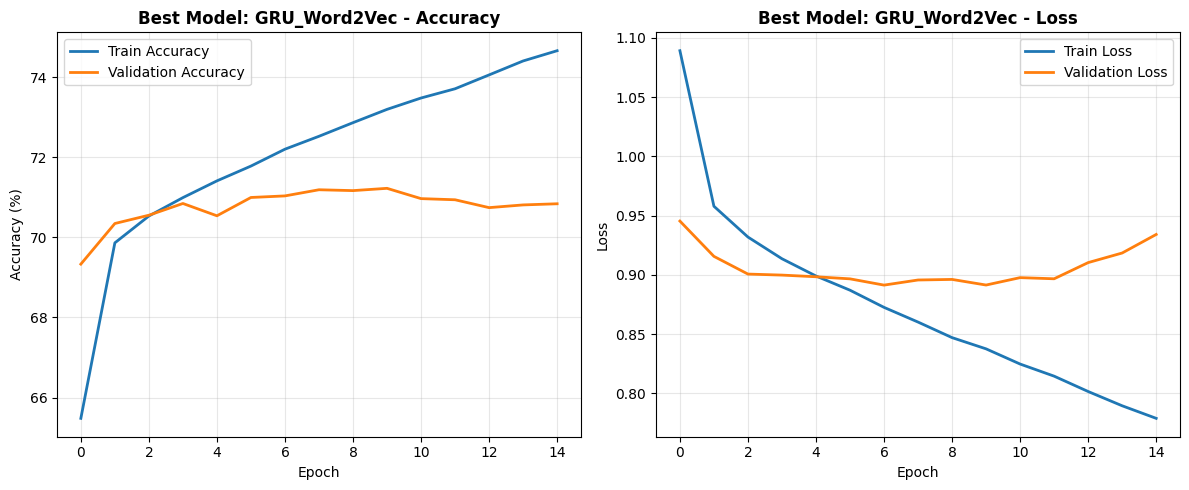


DETAILED CLASSIFICATION REPORT FOR GRU_Word2Vec:
                        precision    recall  f1-score   support

    Business & Finance       0.67      0.48      0.56      6000
  Computers & Internet       0.83      0.87      0.85      6000
 Education & Reference       0.60      0.47      0.53      6000
 Entertainment & Music       0.68      0.70      0.69      6000
Family & Relationships       0.70      0.78      0.74      5999
                Health       0.74      0.80      0.77      6000
 Politics & Government       0.74      0.80      0.77      6000
 Science & Mathematics       0.70      0.78      0.73      6000
     Society & Culture       0.58      0.61      0.59      6000
                Sports       0.87      0.86      0.87      6000

              accuracy                           0.71     59999
             macro avg       0.71      0.71      0.71     59999
          weighted avg       0.71      0.71      0.71     59999



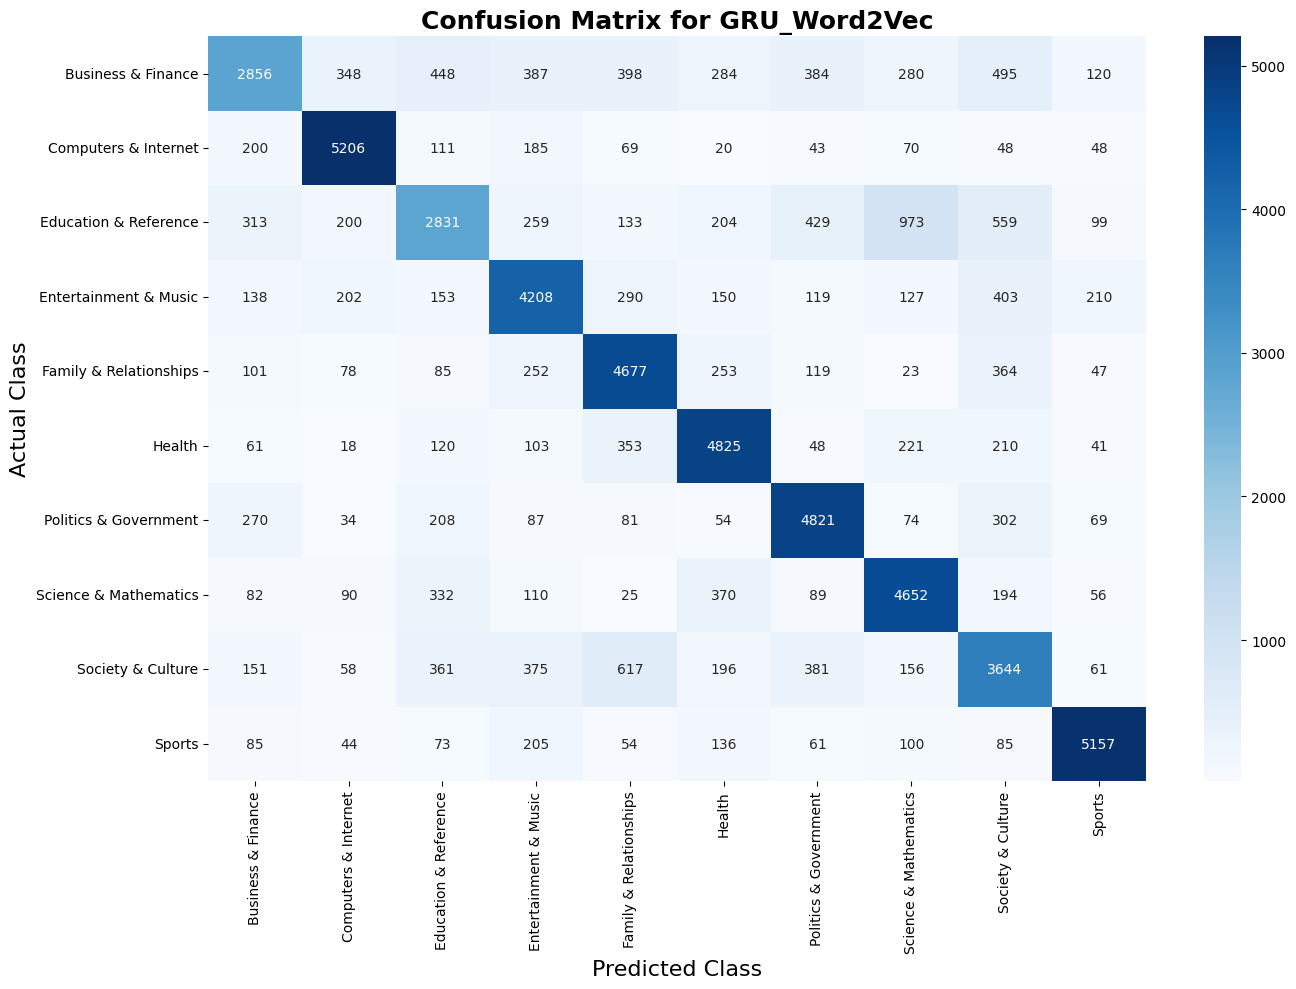


CONFUSION MATRICES FOR ALL MODELS


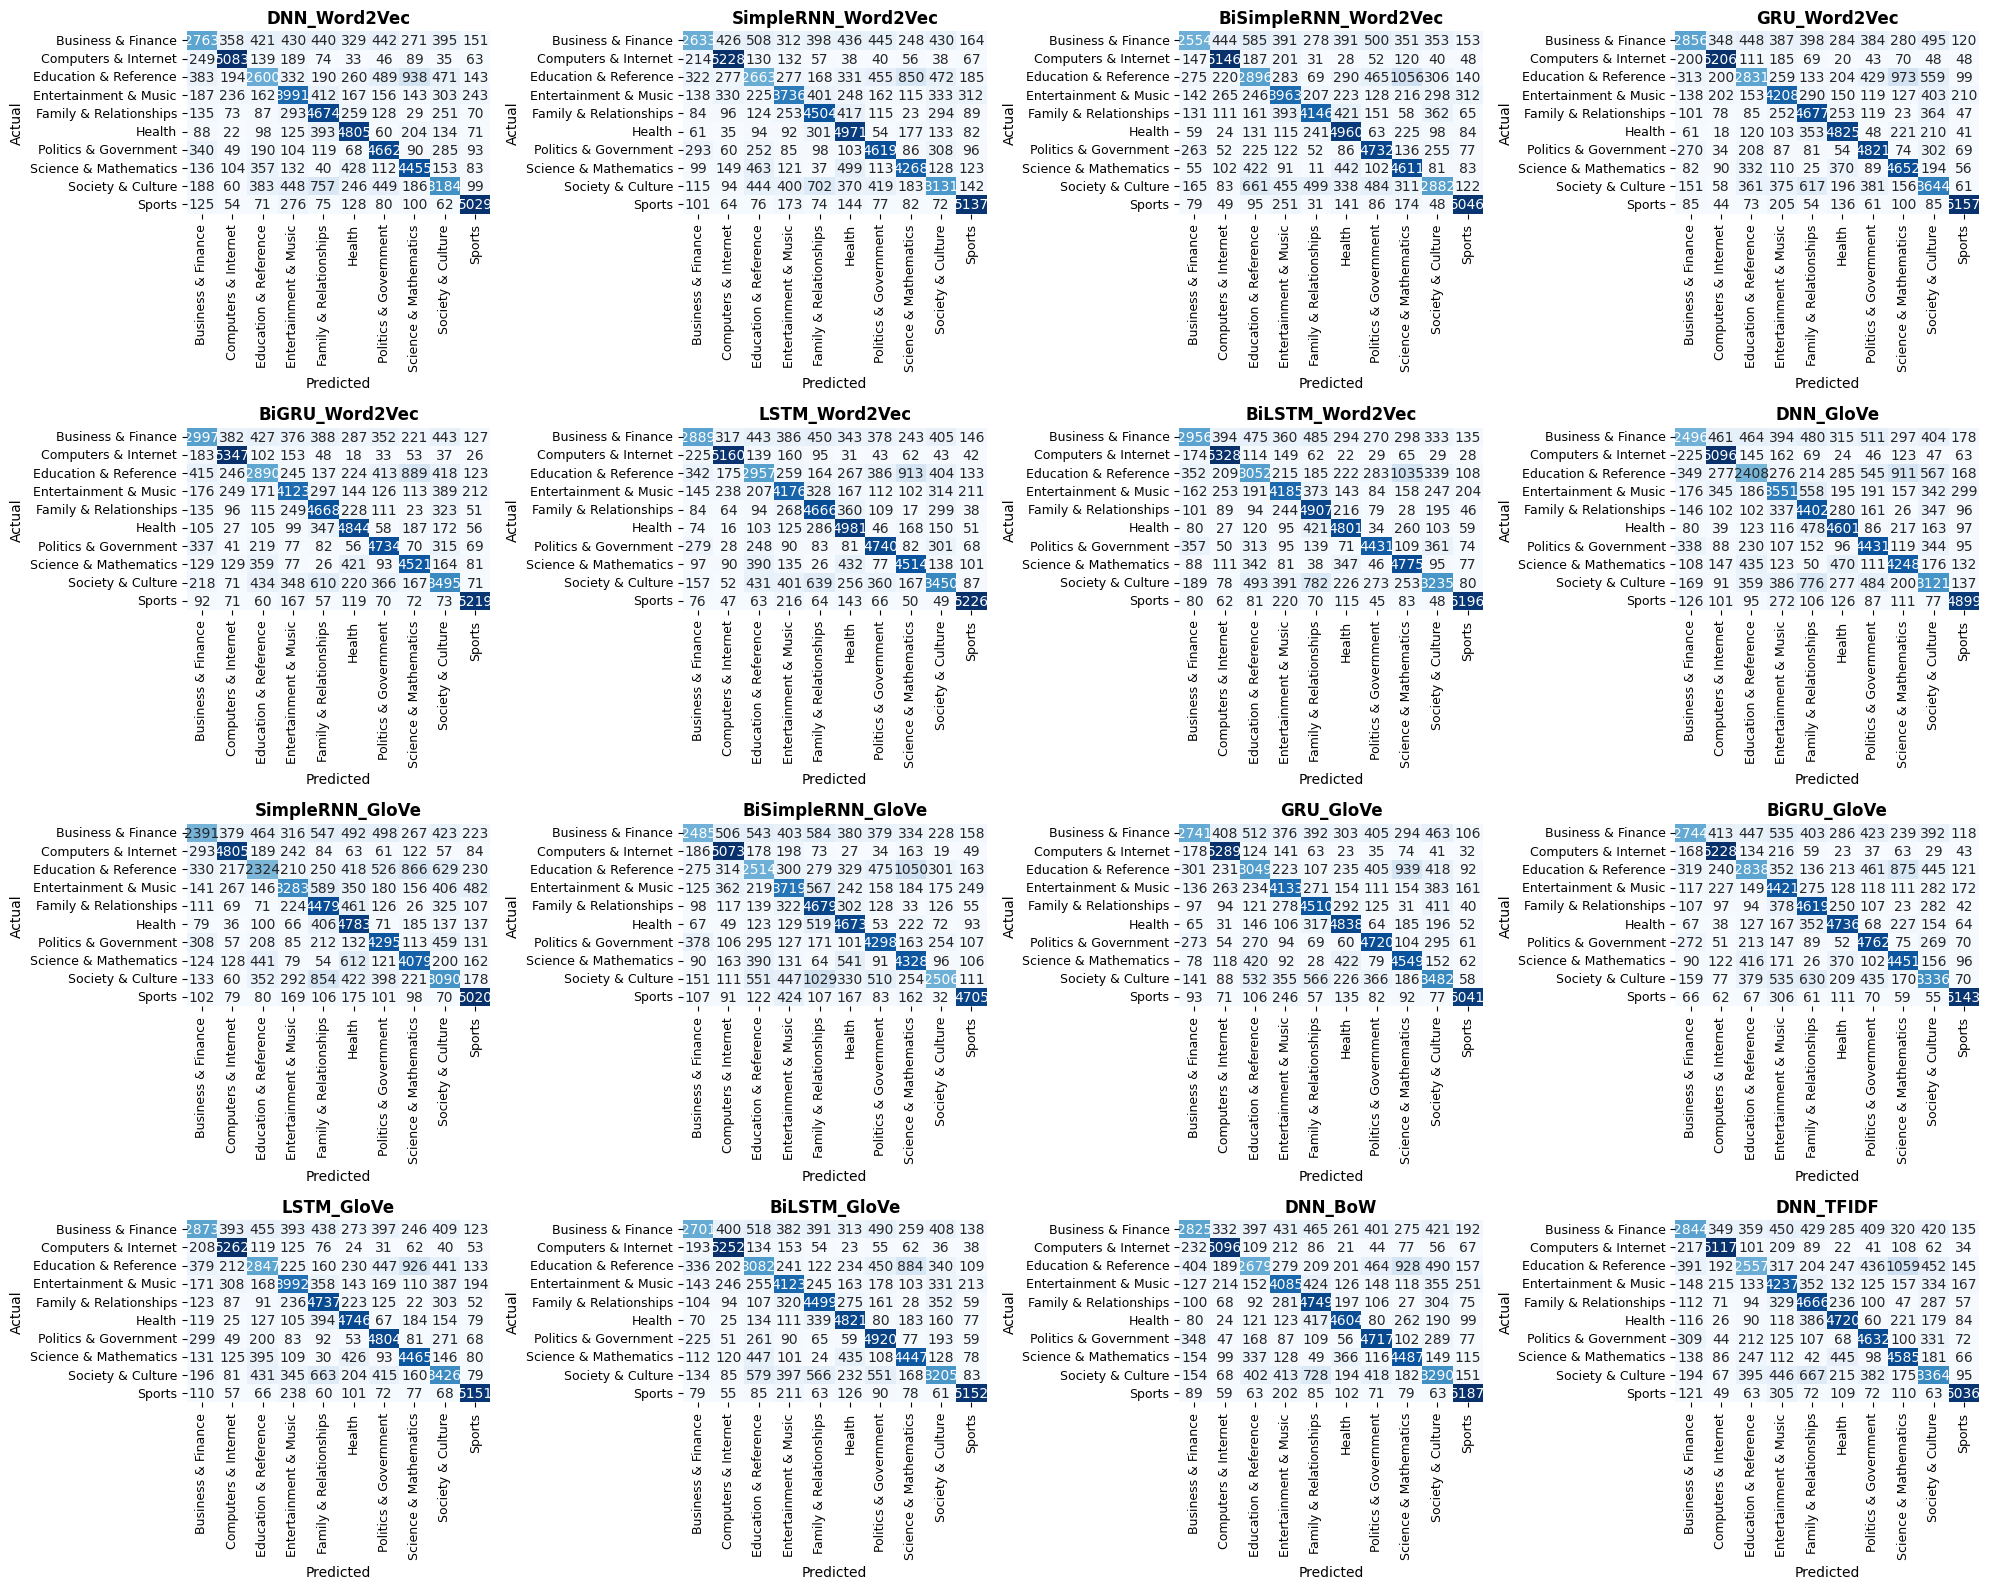


VALIDATION METRICS FOR ALL MODELS

* COMPREHENSIVE VALIDATION METRICS:
        Model_Config  Final_Train_Acc  Final_Val_Acc  Best_Val_Acc  Test_Accuracy  Val_Test_Gap
        GRU_Word2Vec            74.66          70.84         71.22          71.46          0.24
     BiLSTM_Word2Vec            74.89          71.20         71.39          71.44          0.06
      BiGRU_Word2Vec            76.48          70.41         71.40          71.40          0.00
       LSTM_Word2Vec            75.44          70.67         71.34          71.27          0.08
           GRU_GloVe            74.51          70.01         70.52          70.59          0.07
          LSTM_GloVe            74.45          69.89         70.35          70.51          0.16
         BiGRU_GloVe            74.81          69.49         70.39          70.46          0.08
        BiLSTM_GloVe            75.32          69.73         70.26          70.34          0.07
           DNN_TFIDF            89.35          66.62         69.

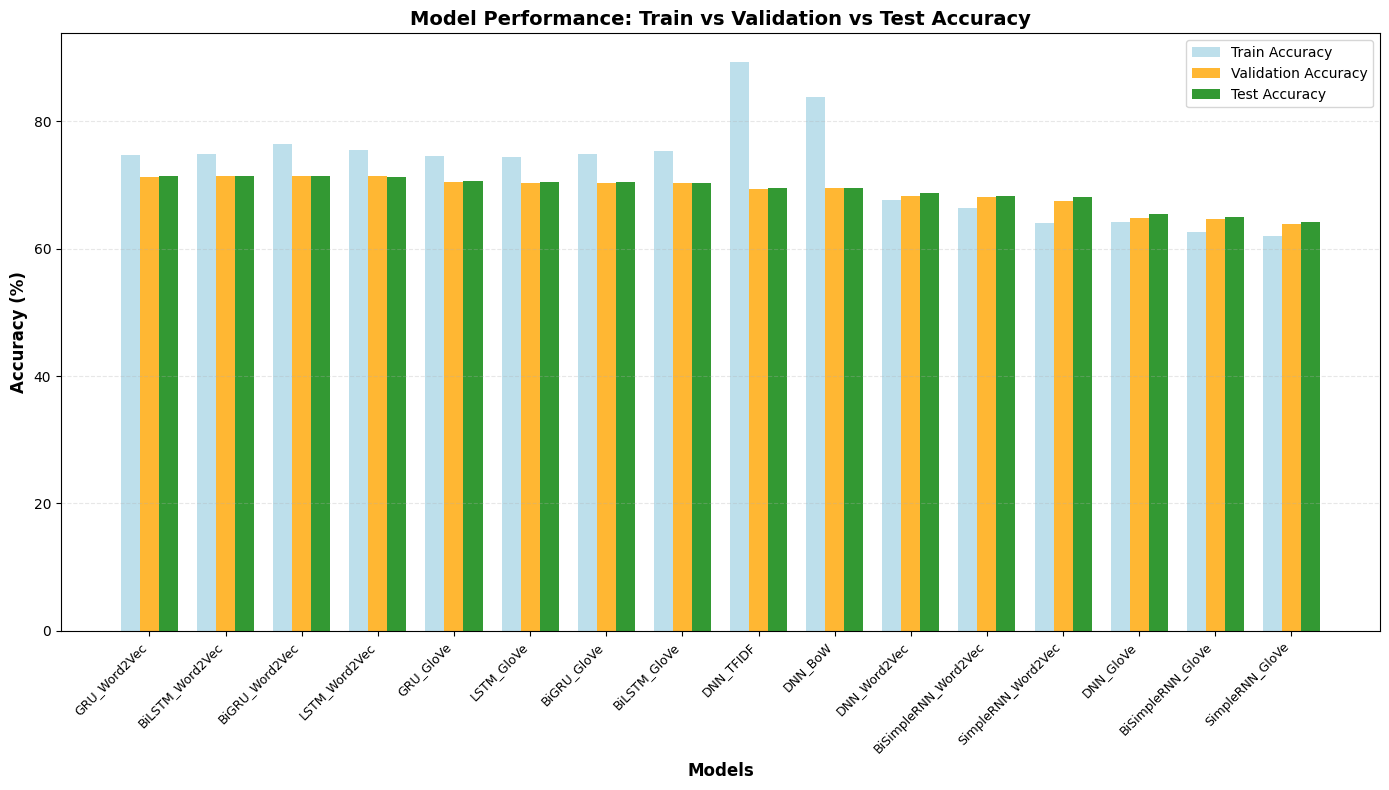

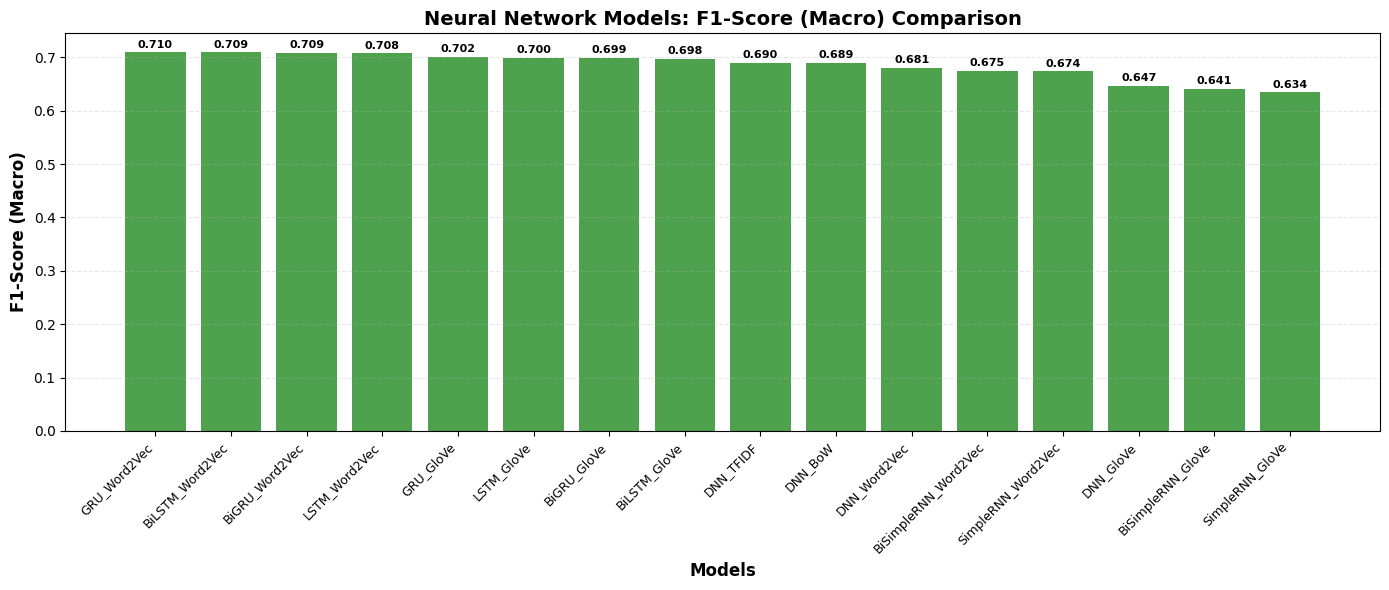

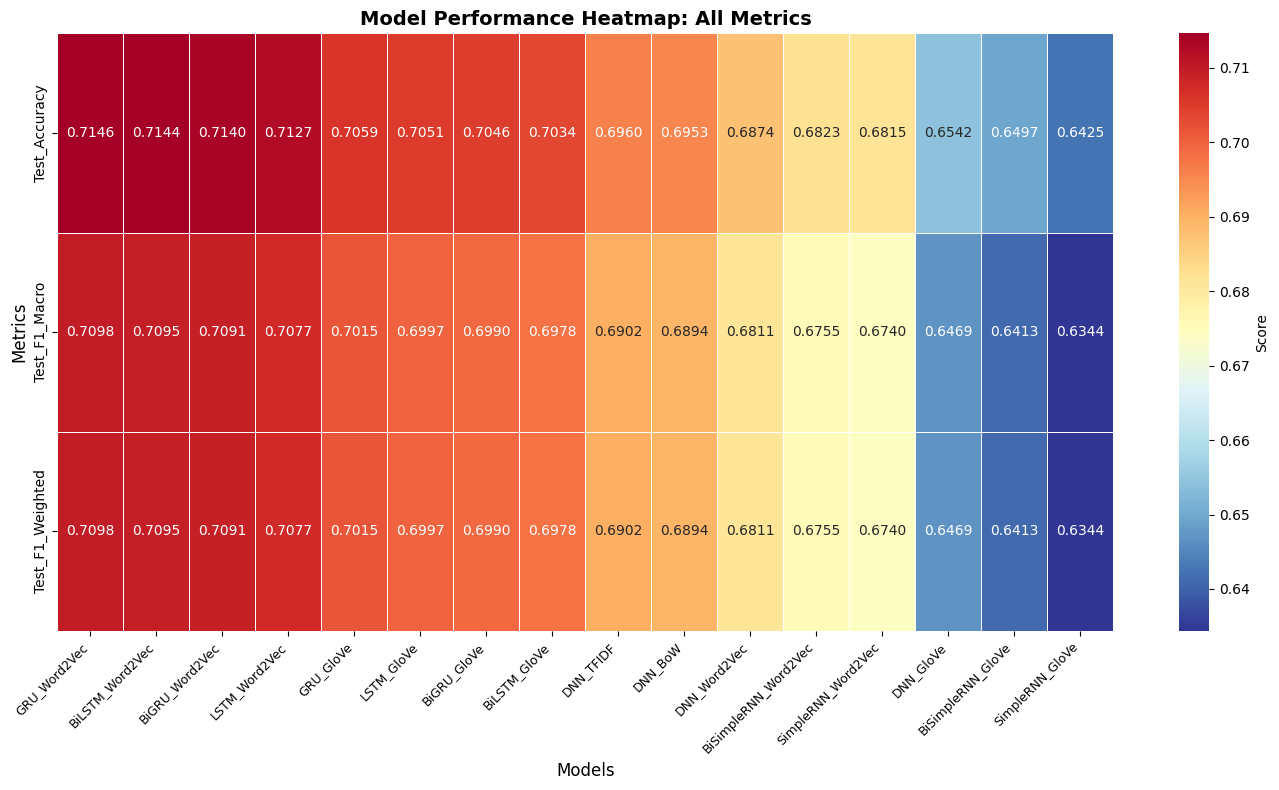


FINAL SUMMARY STATISTICS
ACCURACY STATISTICS:
   - Best Accuracy: 0.7146 (GRU_Word2Vec)
   - Worst Accuracy: 0.6425 (SimpleRNN_GloVe)
   - Mean Accuracy: 0.6915
   - Std Accuracy: 0.0238

F1-SCORE (MACRO) STATISTICS:
   - Best F1-Macro: 0.7098 (GRU_Word2Vec)
   - Worst F1-Macro: 0.6344 (SimpleRNN_GloVe)
   - Mean F1-Macro: 0.6854
   - Std F1-Macro: 0.0250

TRAINING TIME STATISTICS:
   - Fastest Training: 31.51s (SimpleRNN_GloVe)
   - Slowest Training: 94.07s (DNN_GloVe)
   - Mean Training Time: 67.91s

NEURAL NETWORK EXPERIMENTS COMPLETED SUCCESSFULLY!


171420

In [ ]:
# ==============================================================================
# TASK 8: FINAL RESULTS ANALYSIS AND VISUALIZATION
# ==============================================================================
print("\n" + "="*50)
print("FINAL RESULTS ANALYSIS")
print("="*50)

# Create and display final summary DataFrame with ALL required metrics
summary_data = []
for name, res in nn_results.items():
    parts = name.split('_')
    model_type, rep_type = parts[0], parts[1]

    # Calculate weighted F1-score for each model
    weighted_f1 = f1_score(y_test_encoded, res['predictions'], average='weighted')

    summary_data.append({
        'Model_Config': name,
        'Test_Accuracy': res['test_accuracy'],
        'Test_F1_Macro': res['test_f1_macro'],
        'Test_F1_Weighted': weighted_f1,
        'Training_Time': res['training_time']
    })

nn_results_df = pd.DataFrame(summary_data).sort_values(by="Test_Accuracy", ascending=False)

print("\n* COMPREHENSIVE MODEL PERFORMANCE SUMMARY:")
print("=" * 80)
print(nn_results_df.to_string(index=False, float_format='%.4f'))

# Identify best and worst models with detailed analysis
best_model_info = nn_results_df.iloc[0]
worst_model_info = nn_results_df.iloc[-1]

print(f"\n{'='*60}")
print("BEST & WORST PERFORMING MODELS ANALYSIS")
print(f"{'='*60}")
print(f"BEST MODEL: {best_model_info['Model_Config']}")
print(f"   - Test Accuracy: {best_model_info['Test_Accuracy']:.4f}")
print(f"   - F1-Score (Macro): {best_model_info['Test_F1_Macro']:.4f}")
print(f"   - F1-Score (Weighted): {best_model_info['Test_F1_Weighted']:.4f}")
print(f"   - Training Time: {best_model_info['Training_Time']:.2f} seconds")

print(f"\nWORST MODEL: {worst_model_info['Model_Config']}")
print(f"   - Test Accuracy: {worst_model_info['Test_Accuracy']:.4f}")
print(f"   - F1-Score (Macro): {worst_model_info['Test_F1_Macro']:.4f}")
print(f"   - F1-Score (Weighted): {worst_model_info['Test_F1_Weighted']:.4f}")
print(f"   - Training Time: {worst_model_info['Training_Time']:.2f} seconds")

# Performance difference analysis
acc_diff = best_model_info['Test_Accuracy'] - worst_model_info['Test_Accuracy']
f1_macro_diff = best_model_info['Test_F1_Macro'] - worst_model_info['Test_F1_Macro']
print(f"\nPERFORMANCE GAP:")
print(f"   - Accuracy Difference: {acc_diff:.4f} ({acc_diff*100:.2f}%)")
print(f"   - F1-Macro Difference: {f1_macro_diff:.4f}")

# --- DETAILED ANALYSIS FOR BEST MODEL ---
best_model_name = best_model_info['Model_Config']
best_model_results = nn_results[best_model_name]

print(f"\n{'='*70}")
print(f"DETAILED ANALYSIS FOR BEST MODEL: {best_model_name}")
print(f"{'='*70}")

# Verify test accuracy calculation
test_predictions = best_model_results['predictions']
verified_accuracy = accuracy_score(y_test_encoded, test_predictions)
verified_f1_macro = f1_score(y_test_encoded, test_predictions, average='macro')
verified_f1_weighted = f1_score(y_test_encoded, test_predictions, average='weighted')

print(f"TEST ACCURACY VERIFICATION:")
print(f"   - Stored Accuracy: {best_model_results['test_accuracy']:.4f}")
print(f"   - Verified Accuracy: {verified_accuracy:.4f}")
print(f"   - Match: {'YES' if abs(best_model_results['test_accuracy'] - verified_accuracy) < 1e-6 else 'NO'}")

print(f"\nCOMPLETE METRICS FOR BEST MODEL:")
print(f"   - Test Accuracy: {verified_accuracy:.4f}")
print(f"   - F1-Score (Macro): {verified_f1_macro:.4f}")
print(f"   - F1-Score (Weighted): {verified_f1_weighted:.4f}")
print(f"   - Best Validation Accuracy: {best_model_results['best_val_acc']:.2f}%")

# Training History Plot
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Train Accuracy', linewidth=2)
    plt.plot(history['val_acc'], label='Validation Accuracy', linewidth=2)
    plt.title(f'{title} - Accuracy', fontsize=12, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend(); plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='Train Loss', linewidth=2)
    plt.plot(history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title(f'{title} - Loss', fontsize=12, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(); plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print(f"\nTRAINING HISTORY FOR BEST MODEL ({best_model_name}):")
plot_history(best_model_results['history'], f'Best Model: {best_model_name}')

# Classification Report
print(f"\nDETAILED CLASSIFICATION REPORT FOR {best_model_name}:")
print("="*60)
print(classification_report(y_test_encoded, test_predictions, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, test_predictions)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix for {best_model_name}', fontsize=18, fontweight='bold')
plt.ylabel('Actual Class', fontsize=16)
plt.xlabel('Predicted Class', fontsize=16)
plt.tight_layout()
plt.show()

# --- CONFUSION MATRICES FOR ALL MODELS ---
print(f"\n{'='*50}")
print("CONFUSION MATRICES FOR ALL MODELS")
print(f"{'='*50}")

# Create confusion matrices for all models
n_models = len(nn_results)
cols = 4
rows = (n_models + cols - 1) // cols

plt.figure(figsize=(20, rows * 4))
for i, (model_name, results) in enumerate(nn_results.items()):
    plt.subplot(rows, cols, i + 1)
    cm = confusion_matrix(y_test_encoded, results['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{model_name}', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

# --- VALIDATION METRICS FOR ALL MODELS ---
print(f"\n{'='*50}")
print("VALIDATION METRICS FOR ALL MODELS")
print(f"{'='*50}")

# Extract validation accuracies and create comprehensive metrics
validation_metrics = []
for name, res in nn_results.items():
    # Get final training and validation accuracies
    final_train_acc = res['history']['train_acc'][-1] if res['history']['train_acc'] else 0
    final_val_acc = res['history']['val_acc'][-1] if res['history']['val_acc'] else 0
    best_val_acc = res['best_val_acc']

    validation_metrics.append({
        'Model_Config': name,
        'Final_Train_Acc': final_train_acc,
        'Final_Val_Acc': final_val_acc,
        'Best_Val_Acc': best_val_acc,
        'Test_Accuracy': res['test_accuracy'] * 100,  # Convert to percentage
        'Val_Test_Gap': abs(best_val_acc - (res['test_accuracy'] * 100))
    })

val_metrics_df = pd.DataFrame(validation_metrics).sort_values(by="Test_Accuracy", ascending=False)

print("\n* COMPREHENSIVE VALIDATION METRICS:")
print("=" * 90)
print(val_metrics_df.to_string(index=False, float_format='%.2f'))

# --- COMPREHENSIVE COMPARISON VISUALIZATIONS ---
print(f"\n{'='*50}")
print("COMPREHENSIVE MODEL COMPARISON VISUALIZATIONS")
print(f"{'='*50}")

# 1. Train/Validation/Test Accuracy Comparison (Vertical Bar Chart)
plt.figure(figsize=(14, 8))
x = np.arange(len(val_metrics_df))
width = 0.25

# Sort by test accuracy for better visualization
df_sorted = val_metrics_df.sort_values('Test_Accuracy', ascending=False)

train_bars = plt.bar(x - width, df_sorted['Final_Train_Acc'], width,
                    label='Train Accuracy', color='lightblue', alpha=0.8)
val_bars = plt.bar(x, df_sorted['Best_Val_Acc'], width,
                  label='Validation Accuracy', color='orange', alpha=0.8)
test_bars = plt.bar(x + width, df_sorted['Test_Accuracy'], width,
                   label='Test Accuracy', color='green', alpha=0.8)

plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Model Performance: Train vs Validation vs Test Accuracy', fontsize=14, fontweight='bold')
plt.xticks(x, df_sorted['Model_Config'], rotation=45, ha='right', fontsize=9)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. F1-Score Comparison (Vertical Bar Chart)
plt.figure(figsize=(14, 6))
df_sorted_f1 = nn_results_df.sort_values('Test_F1_Macro', ascending=False)
bars = plt.bar(range(len(df_sorted_f1)), df_sorted_f1['Test_F1_Macro'],
               color='forestgreen', alpha=0.8)
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('F1-Score (Macro)', fontsize=12, fontweight='bold')
plt.title('Neural Network Models: F1-Score (Macro) Comparison', fontsize=14, fontweight='bold')
plt.xticks(range(len(df_sorted_f1)), df_sorted_f1['Model_Config'],
           rotation=45, ha='right', fontsize=9)

# Add F1 values on bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Combined Metrics Heatmap
plt.figure(figsize=(14, 8))
metrics_df = nn_results_df[['Model_Config', 'Test_Accuracy', 'Test_F1_Macro', 'Test_F1_Weighted']].set_index('Model_Config')
sns.heatmap(metrics_df.T, annot=True, fmt='.4f', cmap='RdYlBu_r',
           cbar_kws={'label': 'Score'}, linewidths=0.5)
plt.title('Model Performance Heatmap: All Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Metrics', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

# --- FINAL SUMMARY STATISTICS ---
print(f"\n{'='*60}")
print("FINAL SUMMARY STATISTICS")
print(f"{'='*60}")

# Get best and worst models for each metric
best_acc_model = nn_results_df.loc[nn_results_df['Test_Accuracy'].idxmax()]
worst_acc_model = nn_results_df.loc[nn_results_df['Test_Accuracy'].idxmin()]
best_f1_model = nn_results_df.loc[nn_results_df['Test_F1_Macro'].idxmax()]
worst_f1_model = nn_results_df.loc[nn_results_df['Test_F1_Macro'].idxmin()]
fastest_model = nn_results_df.loc[nn_results_df['Training_Time'].idxmin()]
slowest_model = nn_results_df.loc[nn_results_df['Training_Time'].idxmax()]

print(f"ACCURACY STATISTICS:")
print(f"   - Best Accuracy: {best_acc_model['Test_Accuracy']:.4f} ({best_acc_model['Model_Config']})")
print(f"   - Worst Accuracy: {worst_acc_model['Test_Accuracy']:.4f} ({worst_acc_model['Model_Config']})")
print(f"   - Mean Accuracy: {nn_results_df['Test_Accuracy'].mean():.4f}")
print(f"   - Std Accuracy: {nn_results_df['Test_Accuracy'].std():.4f}")

print(f"\nF1-SCORE (MACRO) STATISTICS:")
print(f"   - Best F1-Macro: {best_f1_model['Test_F1_Macro']:.4f} ({best_f1_model['Model_Config']})")
print(f"   - Worst F1-Macro: {worst_f1_model['Test_F1_Macro']:.4f} ({worst_f1_model['Model_Config']})")
print(f"   - Mean F1-Macro: {nn_results_df['Test_F1_Macro'].mean():.4f}")
print(f"   - Std F1-Macro: {nn_results_df['Test_F1_Macro'].std():.4f}")

print(f"\nTRAINING TIME STATISTICS:")
print(f"   - Fastest Training: {fastest_model['Training_Time']:.2f}s ({fastest_model['Model_Config']})")
print(f"   - Slowest Training: {slowest_model['Training_Time']:.2f}s ({slowest_model['Model_Config']})")
print(f"   - Mean Training Time: {nn_results_df['Training_Time'].mean():.2f}s")

print(f"\n{'='*60}")
print("NEURAL NETWORK EXPERIMENTS COMPLETED SUCCESSFULLY!")
print(f"{'='*60}")

# Final memory cleanup
del summary_data, nn_results_df, best_model_info, worst_model_info, best_model_name, best_model_results
del cm, df_sorted, df_sorted_f1, bars, metrics_df, test_predictions, validation_metrics, val_metrics_df
del verified_accuracy, verified_f1_macro, verified_f1_weighted, weighted_f1, acc_diff, f1_macro_diff
del train_bars, val_bars, test_bars
plt.close('all')
torch.cuda.empty_cache() if torch.cuda.is_available() else None
gc.collect()


DETAILED TRAINING METRICS FOR ALL MODELS

--------------------------------------------------
MODEL: DNN_Word2Vec
--------------------------------------------------
TRAINING PROGRESSION:
   - Total Epochs: 28
   - Initial Train Acc: 60.44%
   - Final Train Acc: 67.65%
   - Initial Val Acc: 66.23%
   - Final Val Acc: 68.15%
   - Best Val Acc: 68.25%
LOSS PROGRESSION:
   - Initial Train Loss: 1.2868
   - Final Train Loss: 1.0210
   - Initial Val Loss: 1.0658
   - Final Val Loss: 0.9787
FINAL PERFORMANCE:
   - Test Accuracy: 68.74%
   - Test F1-Macro: 0.6811
   - Training Time: 92.54 seconds
TRAINING IMPROVEMENTS:
   - Train Acc Improvement: +7.21%
   - Val Acc Improvement: +1.92%
   - Train Loss Reduction: 20.66%

--------------------------------------------------
MODEL: SimpleRNN_Word2Vec
--------------------------------------------------
TRAINING PROGRESSION:
   - Total Epochs: 10
   - Initial Train Acc: 61.42%
   - Final Train Acc: 63.99%
   - Initial Val Acc: 65.60%
   - Final Val Ac

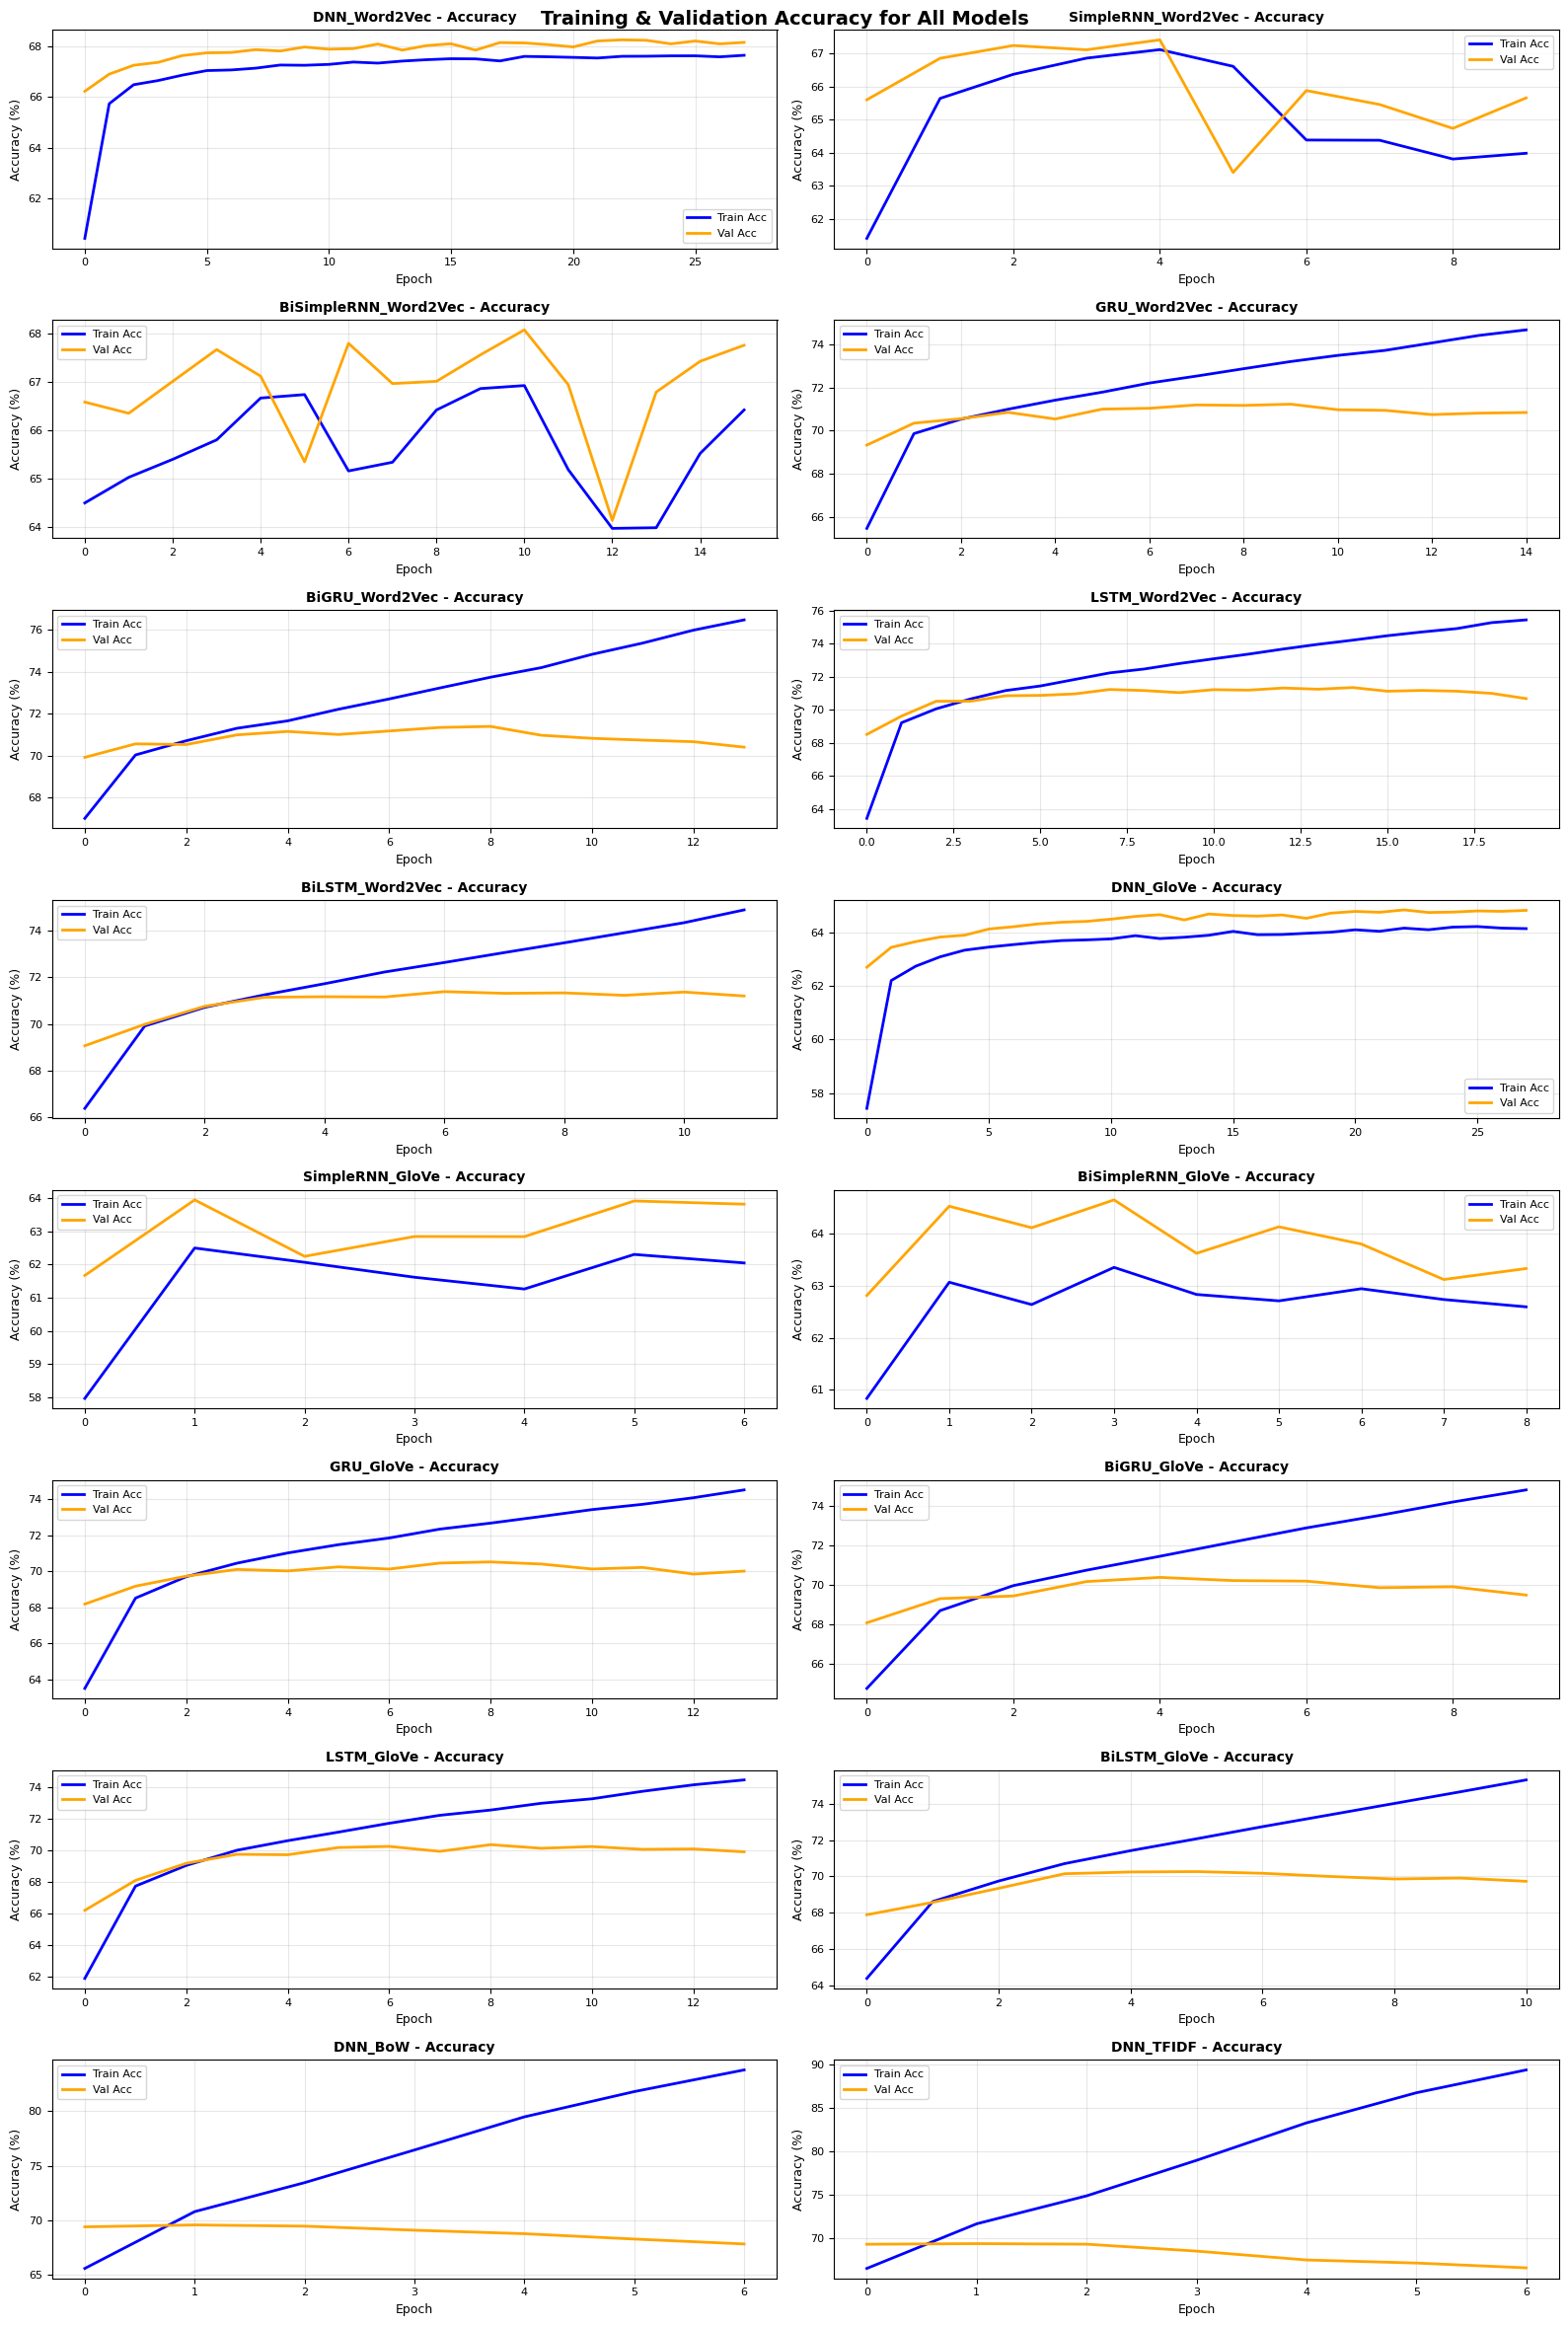

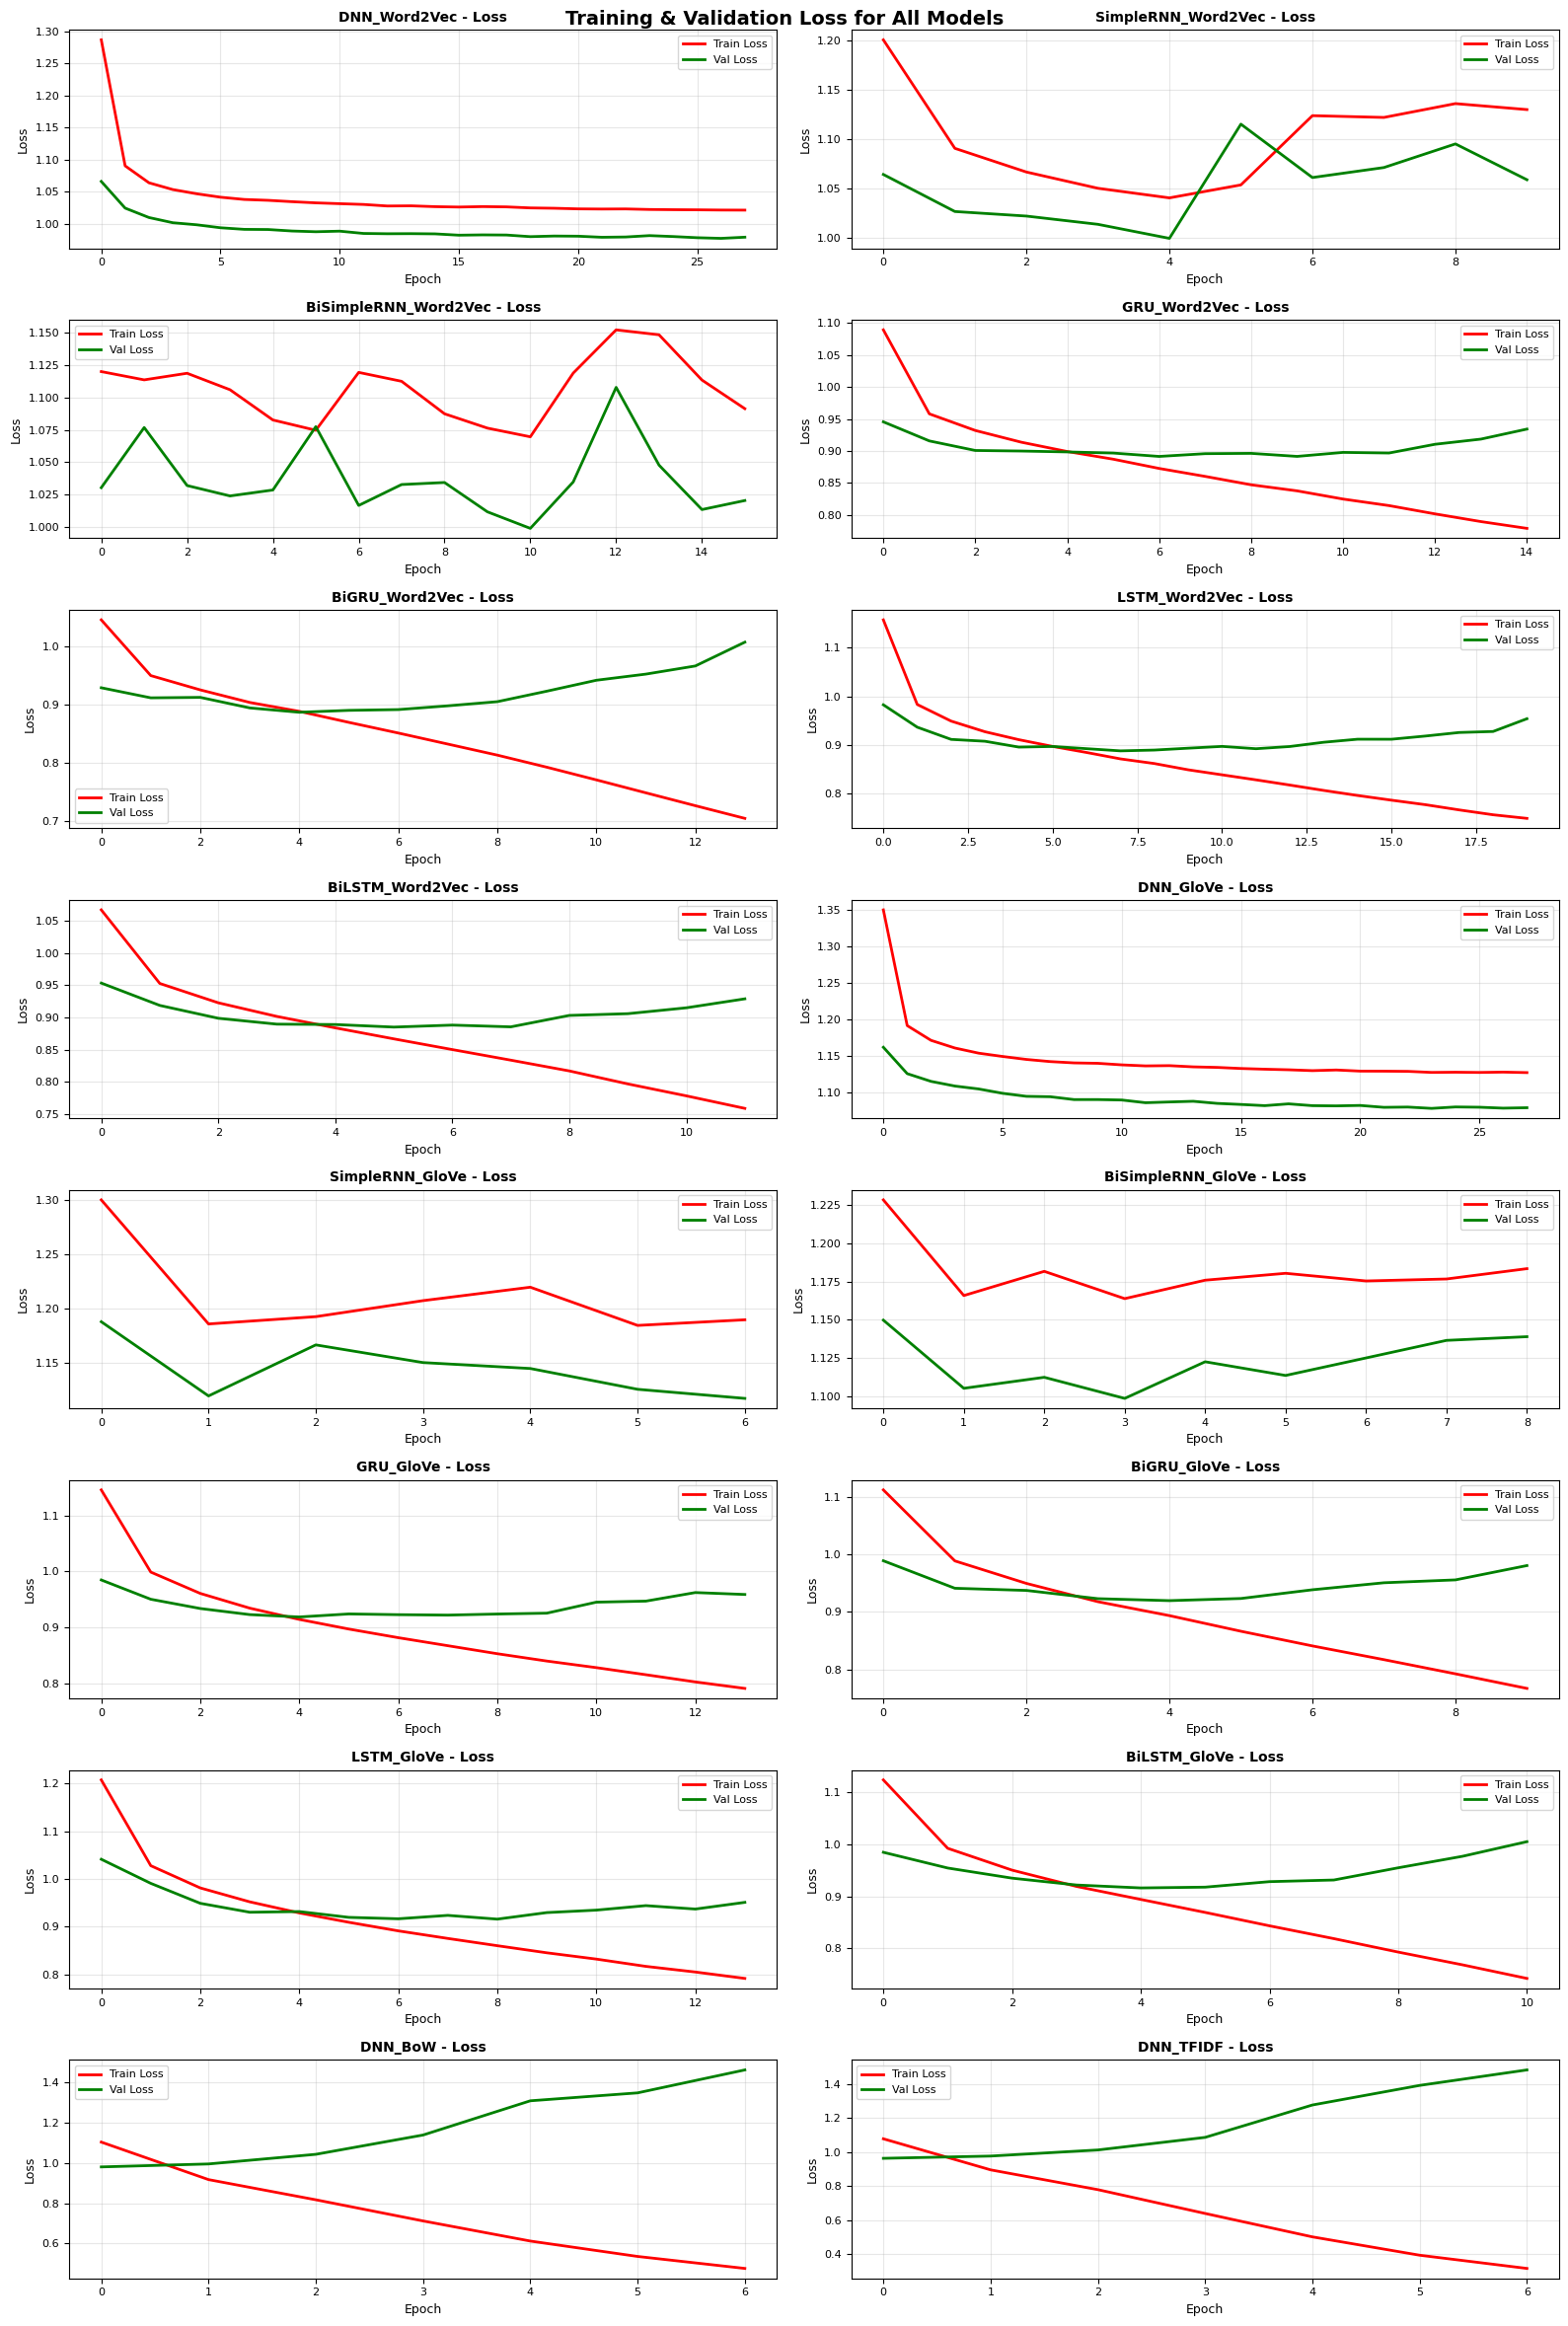

In [ ]:
# ==============================================================================
# COMPREHENSIVE TRAINING METRICS FOR ALL MODELS
# ==============================================================================
print(f"\n{'='*70}")
print("DETAILED TRAINING METRICS FOR ALL MODELS")
print(f"{'='*70}")

# Display comprehensive training details for each model
for model_name, results in nn_results.items():
    print(f"\n{'-'*50}")
    print(f"MODEL: {model_name}")
    print(f"{'-'*50}")

    history = results['history']

    # Training progression summary
    print(f"TRAINING PROGRESSION:")
    print(f"   - Total Epochs: {len(history['train_acc'])}")
    print(f"   - Initial Train Acc: {history['train_acc'][0]:.2f}%")
    print(f"   - Final Train Acc: {history['train_acc'][-1]:.2f}%")
    print(f"   - Initial Val Acc: {history['val_acc'][0]:.2f}%")
    print(f"   - Final Val Acc: {history['val_acc'][-1]:.2f}%")
    print(f"   - Best Val Acc: {results['best_val_acc']:.2f}%")

    # Loss progression
    print(f"LOSS PROGRESSION:")
    print(f"   - Initial Train Loss: {history['train_loss'][0]:.4f}")
    print(f"   - Final Train Loss: {history['train_loss'][-1]:.4f}")
    print(f"   - Initial Val Loss: {history['val_loss'][0]:.4f}")
    print(f"   - Final Val Loss: {history['val_loss'][-1]:.4f}")

    # Performance metrics
    print(f"FINAL PERFORMANCE:")
    print(f"   - Test Accuracy: {results['test_accuracy']*100:.2f}%")
    print(f"   - Test F1-Macro: {results['test_f1_macro']:.4f}")
    print(f"   - Training Time: {results['training_time']:.2f} seconds")

    # Improvement metrics
    train_improvement = history['train_acc'][-1] - history['train_acc'][0]
    val_improvement = history['val_acc'][-1] - history['val_acc'][0]
    loss_reduction = ((history['train_loss'][0] - history['train_loss'][-1]) / history['train_loss'][0]) * 100

    print(f"TRAINING IMPROVEMENTS:")
    print(f"   - Train Acc Improvement: +{train_improvement:.2f}%")
    print(f"   - Val Acc Improvement: +{val_improvement:.2f}%")
    print(f"   - Train Loss Reduction: {loss_reduction:.2f}%")

print(f"\n{'='*70}")
print("TRAINING HISTORY PLOTS FOR ALL MODELS")
print(f"{'='*70}")

# Plot training histories for all models
def plot_all_training_histories():
    n_models = len(nn_results)
    cols = 2
    rows = (n_models + cols - 1) // cols

    # Accuracy plots
    plt.figure(figsize=(16, rows * 3))
    for i, (model_name, results) in enumerate(nn_results.items()):
        plt.subplot(rows, cols, i + 1)
        history = results['history']
        plt.plot(history['train_acc'], label='Train Acc', linewidth=2, color='blue')
        plt.plot(history['val_acc'], label='Val Acc', linewidth=2, color='orange')
        plt.title(f'{model_name} - Accuracy', fontsize=10, fontweight='bold')
        plt.xlabel('Epoch', fontsize=9)
        plt.ylabel('Accuracy (%)', fontsize=9)
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)

    plt.suptitle('Training & Validation Accuracy for All Models', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Loss plots
    plt.figure(figsize=(16, rows * 3))
    for i, (model_name, results) in enumerate(nn_results.items()):
        plt.subplot(rows, cols, i + 1)
        history = results['history']
        plt.plot(history['train_loss'], label='Train Loss', linewidth=2, color='red')
        plt.plot(history['val_loss'], label='Val Loss', linewidth=2, color='green')
        plt.title(f'{model_name} - Loss', fontsize=10, fontweight='bold')
        plt.xlabel('Epoch', fontsize=9)
        plt.ylabel('Loss', fontsize=9)
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)

    plt.suptitle('Training & Validation Loss for All Models', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_all_training_histories()